In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
%matplotlib inline
import numpy as np
import scipy.linalg as sl
# we'll start using sparse matrices here
import scipy.sparse as sp
# and linear algebra functions designed for sparse matrices
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Computational Mathematics  <a class="tocSkip">

## PDE solvers (intro to finite differences) <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differentiation-(or-taking-a-derivative)---the-continuous-definition" data-toc-modified-id="Differentiation-(or-taking-a-derivative)---the-continuous-definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differentiation (or taking a derivative) - the continuous definition</a></span></li><li><span><a href="#Finite-differences" data-toc-modified-id="Finite-differences-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finite differences</a></span><ul class="toc-item"><li><span><a href="#The-forward-difference" data-toc-modified-id="The-forward-difference-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The forward difference</a></span></li><li><span><a href="#Taylor-series-to-estimate-accuracy" data-toc-modified-id="Taylor-series-to-estimate-accuracy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Taylor series to estimate accuracy</a></span><ul class="toc-item"><li><span><a href="#Taylor-series-example-[from-previous-lecture]" data-toc-modified-id="Taylor-series-example-[from-previous-lecture]-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Taylor series example [from previous lecture]</a></span></li><li><span><a href="#Order-of-convergence---higher-generally-better" data-toc-modified-id="Order-of-convergence---higher-generally-better-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Order of convergence - higher generally better</a></span></li></ul></li><li><span><a href="#The-backward-difference" data-toc-modified-id="The-backward-difference-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The backward difference</a></span></li><li><span><a href="#The-central-difference" data-toc-modified-id="The-central-difference-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>The central difference</a></span></li><li><span><a href="#Example:-Write-a-function-to-perform-numerical-differentiation" data-toc-modified-id="Example:-Write-a-function-to-perform-numerical-differentiation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Example: Write a function to perform numerical differentiation</a></span></li><li><span><a href="#Example:-Compute-the-derivative-of-$\sin(x)$" data-toc-modified-id="Example:-Compute-the-derivative-of-$\sin(x)$-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Example: Compute the derivative of $\sin(x)$</a></span></li><li><span><a href="#How-small-(or-large)-can-$\Delta-x$-go?" data-toc-modified-id="How-small-(or-large)-can-$\Delta-x$-go?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>How small (or large) can $\Delta x$ go?</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Approximating-second-derivatives" data-toc-modified-id="Approximating-second-derivatives-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Approximating second derivatives</a></span></li></ul></li><li><span><a href="#Introduction-to-BVPs" data-toc-modified-id="Introduction-to-BVPs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to BVPs</a></span><ul class="toc-item"><li><span><a href="#Problem-non-dimensionalisation" data-toc-modified-id="Problem-non-dimensionalisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Problem non-dimensionalisation</a></span></li><li><span><a href="#Model-problem---BVP:-steady-state-advection-diffusion" data-toc-modified-id="Model-problem---BVP:-steady-state-advection-diffusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model problem - BVP: steady-state advection-diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Methods-for-solving-BVPs" data-toc-modified-id="Methods-for-solving-BVPs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Methods for solving BVPs</a></span></li><li><span><a href="#Defining-a-grid-(or-mesh)" data-toc-modified-id="Defining-a-grid-(or-mesh)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Defining a grid (or mesh)</a></span></li><li><span><a href="#Dealing-with-Dirichlet-boundary-conditions" data-toc-modified-id="Dealing-with-Dirichlet-boundary-conditions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with Dirichlet boundary conditions</a></span></li><li><span><a href="#Solving-the-diffusion-equation" data-toc-modified-id="Solving-the-diffusion-equation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Solving the diffusion equation</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li><li><span><a href="#The-time-independent-(steady)-advection-diffusion-problem" data-toc-modified-id="The-time-independent-(steady)-advection-diffusion-problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The time-independent (steady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#Discretisation-choices-for-advection-and-diffusion" data-toc-modified-id="Discretisation-choices-for-advection-and-diffusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Discretisation choices for advection and diffusion</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#More-observations" data-toc-modified-id="More-observations-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>More observations</a></span></li></ul></li><li><span><a href="#Upwind-for-advection" data-toc-modified-id="Upwind-for-advection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Upwind for advection</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Analysis-of-the-upwind-scheme-[$\star$]" data-toc-modified-id="Analysis-of-the-upwind-scheme-[$\star$]-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis of the upwind scheme [$\star$]</a></span></li><li><span><a href="#Practicalities!" data-toc-modified-id="Practicalities!-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Practicalities!</a></span></li></ul></li><li><span><a href="#The-time-dependent-(unsteady)-advection-diffusion-problem" data-toc-modified-id="The-time-dependent-(unsteady)-advection-diffusion-problem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The time-dependent (unsteady) advection-diffusion problem</a></span><ul class="toc-item"><li><span><a href="#The-equation-in-higher-spatial-dimensions-[$\star$]" data-toc-modified-id="The-equation-in-higher-spatial-dimensions-[$\star$]-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The equation in higher spatial dimensions [$\star$]</a></span></li><li><span><a href="#Non-dimensionalisation" data-toc-modified-id="Non-dimensionalisation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Non-dimensionalisation</a></span></li><li><span><a href="#The-Method-of-Lines" data-toc-modified-id="The-Method-of-Lines-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>The Method of Lines</a></span><ul class="toc-item"><li><span><a href="#Defining-a-spatial-grid" data-toc-modified-id="Defining-a-spatial-grid-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Defining a spatial grid</a></span></li></ul></li><li><span><a href="#Discretising-in-space" data-toc-modified-id="Discretising-in-space-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Discretising in space</a></span><ul class="toc-item"><li><span><a href="#Including-Dirichlet-boundary-conditions" data-toc-modified-id="Including-Dirichlet-boundary-conditions-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Including Dirichlet boundary conditions</a></span></li><li><span><a href="#The-initial-condition" data-toc-modified-id="The-initial-condition-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>The initial condition</a></span></li><li><span><a href="#The-(semi-)-discretised-system" data-toc-modified-id="The-(semi-)-discretised-system-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>The (semi-) discretised system</a></span></li></ul></li><li><span><a href="#The-semi-disrete-matrix-system" data-toc-modified-id="The-semi-disrete-matrix-system-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>The semi-disrete matrix system</a></span></li><li><span><a href="#Discretising-in-time" data-toc-modified-id="Discretising-in-time-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Discretising in time</a></span><ul class="toc-item"><li><span><a href="#Forward-Euler" data-toc-modified-id="Forward-Euler-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Forward Euler</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Example---advection-diffusion-of-a-Gaussian" data-toc-modified-id="Example---advection-diffusion-of-a-Gaussian-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Example - advection-diffusion of a Gaussian</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Periodic-boundaries" data-toc-modified-id="Periodic-boundaries-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Periodic boundaries</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-5.8.1"><span class="toc-item-num">5.8.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li></ul></li><li><span><a href="#Stability-considerations-(a-summary)" data-toc-modified-id="Stability-considerations-(a-summary)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stability considerations (a summary)</a></span><ul class="toc-item"><li><span><a href="#Cell-Peclet-number" data-toc-modified-id="Cell-Peclet-number-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Cell Peclet number</a></span></li><li><span><a href="#The-Courant-number-and-the-CFL-condition" data-toc-modified-id="The-Courant-number-and-the-CFL-condition-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>The Courant number and the CFL condition</a></span></li><li><span><a href="#The-CFL-condition---a-physical-interpretation-[$\star$]" data-toc-modified-id="The-CFL-condition---a-physical-interpretation-[$\star$]-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>The CFL condition - a physical interpretation [$\star$]</a></span></li><li><span><a href="#The-r-number/parameter-for-diffusion" data-toc-modified-id="The-r-number/parameter-for-diffusion-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>The r-number/parameter for diffusion</a></span></li><li><span><a href="#Other-time-stepping-options" data-toc-modified-id="Other-time-stepping-options-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Other time stepping options</a></span></li></ul></li><li><span><a href="#Final-comments" data-toc-modified-id="Final-comments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final comments</a></span></li></ul></div>

# Learning objectives: <a class="tocSkip">


* Learn about finite difference approximations to derivatives and how to derive them. 
    
    
[Note that this will be our route into *spatial* derivatives, even though the approaches don't care what we are taking derivatives w.r.t., and indeed we saw some of these methods when we covered "time"-stepping methods.]


* Be able to implement forward, backward and central difference methods.


* Calculate higher-order derivatives as well as higher-order approximations on larger stencils.


* Introduction to BVPs as steady-state PDEs.


* Understand and recognise some of the issues that result from rapid (relative to the mesh resolution) variations in the solution - e.g. the presence of sharp boundary layers, and how this related to *stability*.


* Understand the qualitative differences between the use of *central* and *upwind* based schemes for advection, and the usefulness of the grid/cell Peclet number as a diagnostic.


* To combine knowledge of spatial discretisations and ODE solvers in order to develop solver for unsteady PDEs.


* To understand ***three key stability issues*** - where these come from and how they can be "managed".  One of these is the *cell Peclet number* related issue from the previous lecture, while the other two relate to the time derivative and limiting the *speed of information propagation* on the discrete mesh.


# Differentiation (or taking a derivative) - the continuous definition


The classical definition of the derivative of a function $f$ at a point $x_0$ is of course given by:

 $$f'(x_0)=\lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}. $$
 
 
**Notation** 
 
1. Note that the following are all equivalent mathematical ways of writing the derivative of the function $f$ with respect to (w.r.t.) $x$ and evaluated at the location $x_0$:
 
 $$  f'(x_0) = \frac{df}{dx}(x_0) = \left.\frac{df}{dx}\right|_{x_0}. $$
 
 
2. We're using $h$ here to denote a small (potentially infinitesimally small) increment to the $x$ coordinate, as is common. But note that in the literature $\Delta x$ is commonly used to mean the same thing. Also, of course for finite $h$ there is significant overlap here with the mesh spacing in a numerical approximation, as we shall see below, and so $\Delta x$ is also used.

# Finite differences 

Finite differences are a class of approximation method for estimating/computing derivatives of functions.


In this lecture we shall largely focus on the case of functions of a single spatial dimension $x$ (e.g. $\;f\equiv f(x)\;$ or $\;u\equiv u(x)$), but these ideas extend to for time derivatives (initial-value problems - IVPs) and multiple spatial dimensions (PDEs).


Approximations to the derivatives of a function can be computed by using weighted sums of function evaluations at a number of points.


We've already made use of the simplest finite difference approximation to a (first-order) derivative in a couple of places in previous lectures. We will now do this more formally, to allow us to develop better formulae, as well as approximations suitable for higher-order derivatives.

## The forward difference

For example, we can turn the formal definition of a derivative given above into an approximation rule by replacing the limit as $h$ approaches zero (i.e. the $\text{lim}_{h\rightarrow\infty}$) with a small but finite $\Delta x$ value:

$$ f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\;\;\;\; \Delta x>0. $$

Since this approximate gradient method uses values of $x$ greater than $x_0$ ($\Delta x>0$) to estimate the derivative at $x_0$, this approach is known as the **forward difference method**. 

The figure below illustrates this approximation. 

In the figure the derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line - if the second (and/or higher) derivative of the function is large then this approximation might not be very good, unless you make $\Delta x$ very small.

You can see this yourself by varying the value of $\Delta x$ in the code below.

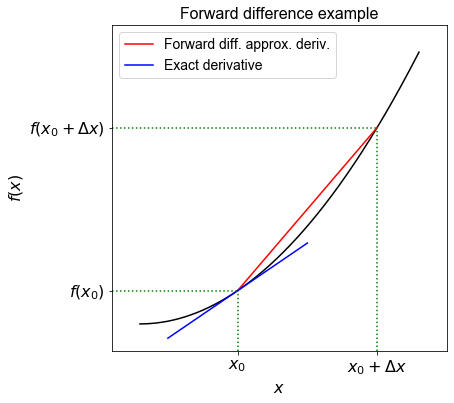

In [3]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Forward difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the 'exact' solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
x0 = 0.35
dx = 0.5
x1 = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([x0, x1], [f(x0), f(x1)], 'r', label = 'Forward diff. approx. deriv.')

# plot a line representing the exact derivative (given by function f(.)) at x=x0 in blue
# choose an h purely for plotting purposes, we use the true derivative df to find the slope
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')

# add some axes labels and lines etc
ax1.set_xticks((x0, x1))
ax1.set_xticklabels(('$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([x0, x0], [-0.1, f(x0)], 'g:')
ax1.plot([x1, x1], [-0.1, f(x1)], 'g:')
ax1.set_yticks((f(x0), f(x1)))
ax1.set_yticklabels(('$f(x_0)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, x0], [f(x0), f(x0)], 'g:')
ax1.plot([-0.1, x1], [f(x1), f(x1)], 'g:')
ax1.legend(loc='best', fontsize=14);

## Taylor series to estimate accuracy

We can use a [Taylor series expansion](http://mathworld.wolfram.com/TaylorSeries.html), or *Taylor series analysis*, to estimate the accuracy of the method. 

Recall that Taylor series in one dimension tells us that we can approximate the value of the function at a location in terms of its value, and value of its derivative, at a nearby point:

\begin{align*}
f(x_0+h) & = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\[5pt]
& = f(x_0)+hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \mathcal{O}(h^3),
\end{align*}
 
where $\mathcal{O}(h^3)$ represents the collection of terms that are third-order in $h$ or higher.

We call this the Taylor series expansion *about (or around) the point $x_0$* (since all the functions in the expansion on the RHS are evaluated at this point).

As soon as we start thinking about a mesh, or a mesh spacing, we may prefer to change notation $h\rightarrow\Delta x$.

<br>


An equivalent way of writing this expansion would of course be (just define $x:=x_0+h$, so that $h=x-x_0$)

$$f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) + \mathcal{O}((x - x_0)^4).$$


### Taylor series example [from previous lecture]

*Wikipedia image: The exponential function (in blue), and the sum of the first (n + 1) terms of its Taylor series expansion around the point 0 (in red).*

<img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif" width=200x>

<br>

More terms equate with a better approximation, valid a larger distance from $x_0$, but also providing better estimates of the derivatives at the expansion point. 

At the moment we are concerned with evaluating a first derivative numerically.

We can rearrange the Taylor series expansion expression to isolate the gradient term $f'(x_0)$ on the LHS:

$$ hf'(x_0) = f(x_0+h)-f(x_0) + \mathcal{O}(h^2), $$
 
and therefore, by dividing through by $h$, we know that the following must be true
 
$$ f'(x_0) = \frac{f(x_0+h)-f(x_0)}{h} + \mathcal{O}(h). $$

Since we have divided through by $h$ this means that the remainder term becomes $\mathcal{O}(h)$ - we therefore know that the forward difference method introduced above's truncation error (in the limit of small $h$) looks like a constant multiplied by $h$ to the power of 1. 

[Notice with a Taylor series analysis such as this we will always be left with an error proportional to some integer power of $h$].

This means that the forward difference method is *first-order accurate* - as we make the spacing $h$ smaller we expect the error in our derivative to fall linearly - halving $h$ should halve the error.

### Order of convergence - higher generally better

For general numerical methods we generally strive for something better than this - if we halve our $h$ we would like our error to drop super-linearly: i.e. by a factor of 4 (second-order method) or 8 (third-order method) or more.

But note that as we shall see when we start to solve some differential equations, reducing the size of $h$ or $\Delta x$ (i.e. refining our computational mesh) does generally come at the expense of doing more work overall.  So there is a trade-off in accuracy vs cost.

## The backward difference

We can of course come up with an alternative to the forward difference by taking information from the other side of $x_0$:

$$ f'(x_0)\approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x},\qquad \Delta x>0, $$

and as hopefully won't be a surprise we call this a **backward difference**. 

It suffers from similar issues to the forward difference, and is first-order accurate.

But its qualitative behaviour when we use it to solve differential equations is very different.

Later on in the BVP section it will prove useful to explicitly write out the form of the leading order term in the error, which from the appropriate Taylor series expansion is:

$$ \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x} = f'(x_0) - \frac{\Delta x}{2} f''(x_0) + \mathcal{O}(\Delta x^2). $$

## The central difference

In an attempt to derive a more accurate method we can make use of two Taylor series expansions - one in the positive $x$ direction from $x_0$, and one in the negative direction. 

Since we hope to achieve better than first-order accuracy, we include an extra term explicitly in the series expansions:

\begin{align*}
f(x_0+ \Delta x) &= f(x_0)+\Delta x f'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3)\\[5pt]
f(x_0- \Delta x) &= f(x_0)- \Delta x f'(x_0)+\frac{(-\Delta x)^2}{2}f''(x_0) + \mathcal{O}((-\Delta x)^3).
\end{align*}

Using the fact that $(-\Delta x)^2=\Delta x^2$ and the absolute value signs from the definition of $\mathcal{O}$ (that is we don't worry about signs when using the $\mathcal{O}$ notation), this is equivalent to:

\begin{align*} 
f(x_0+\Delta x) &= f(x_0)+\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3),\\[5pt]
f(x_0-\Delta x) &= f(x_0)-\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3).
\end{align*}

Remember that we are looking for an expression for $f'(x_0)$. Noticing the sign change between the derivative terms in the two equations, we subtract the second equation from the first to give:

$$ f(x_0+\Delta x)-f(x_0-\Delta x)=2\Delta xf'(x_0) + \mathcal{O}(\Delta x^3).$$

Finally, we can rearrange to get an expression for $f'(x_0)$:

$$ f'(x_0)=\frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x} + \mathcal{O}(\Delta x^2),$$

which, contrary to the first-order forward and backward differences seen above, is an approximation to the derivative that is *second-order* accurate.

By considering an interval symmetric about $x_0$, we have created a second-order approximation for the derivative of $f$. 

This symmetry gives the scheme its name: the central difference method. 

The figure below illustrates this scheme. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line.  

Even without the analysis above it's hopefully clear visually why this should in general give a lower error than both the forward and backward difference approaches. 

The analysis of the two methods does tell us that as we halve $h$ the error should drop by a factor 4 rather than the 2 we get for the first-order forward or backward differencing.

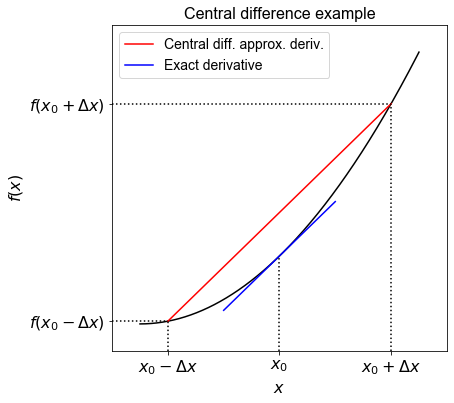

In [4]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
# ax.grid(True)
ax1.set_title('Central difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the exact solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
dx = 0.4
x0 = 0.5
xl = x0 - dx
xr = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([xl, xr], [f(xl), f(xr)], 'r', label = 'Central diff. approx. deriv.')

# plot a line representing the exact derivative (given by function f(.)) at x=x0 in blue
# choose an h purely for plotting purposes, we use the true derivative df to find the slope
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# add some axes labels and lines etc
ax1.set_xticks((xl, x0, xr))
ax1.set_xticklabels(('$x_0-\Delta x$', '$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([xl, xl], [-0.1, f(xl)], 'k:')
ax1.plot([xr, xr], [-0.1, f(xr)], 'k:')
ax1.plot([x0, x0], [-0.1, f(x0)], 'k:')
ax1.set_yticks((f(xl), f(xr)))
ax1.set_yticklabels(('$f(x_0-\Delta x)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, xl], [f(xl), f(xl)], 'k:')
ax1.plot([-0.1, xr], [f(xr), f(xr)], 'k:')
ax1.legend(loc='best', fontsize=14);

## Example: Write a function to perform numerical differentiation

As covered above, the expression

$$\frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x},$$

can be used to find an approximate derivative of the function $f(x)$ provided that $\Delta x$ is appropriately small. 

Let's write a function `diff(f, x, dx = 1.0e-6)` that returns the approximation of the derivative of a mathematical function represented by a Python function `f(x)`.

Let's apply the above formula to differentiate $\,f(x) = e^x\,$ at $\,x = 0$, $\,f(x) = e^{−2x}\,$ at $\,x = 0$, $\,f(x) = \cos(x)\,$ at $\,x = 2\pi$, and $\,f(x) = \ln(x)\,$ at $\,x = 1\,$, i.e. functions we know the exact derivative of.

In each case, using $\,\Delta x = 0.01$, let's write out the error, i.e. the difference between the exact derivative and the result of the formula above.

In [5]:
def diff(f, x, dx=1e-6):
    numerator = f(x + dx) - f(x - dx)
    derivative = numerator / ( 2.0 * dx )
    return derivative

dx = 0.01
x = 0
f = np.exp
derivative = diff(f, x, dx)
print("The approximate derivative of exp(x) at x = 0 is: %f. The error is %f."
      % (derivative, abs(derivative - 1)))
x = 0

def g(x):
    return np.exp(-2*x)

derivative = diff(g, x, dx)
print('The approximate derivative of exp(-2*x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - (-2.0))))

x = 2*np.pi
f = np.cos
derivative = diff(f, x, dx)
print('The approximate derivative of cos(x) at x = 2*pi is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 0)))

x = 1
f = np.log
derivative = diff(f, x, dx)
print('The approximate derivative of ln(x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 1)))

The approximate derivative of exp(x) at x = 0 is: 1.000017. The error is 0.000017.
The approximate derivative of exp(-2*x) at x = 0 is: -2.00013.  The error is 0.00013.
The approximate derivative of cos(x) at x = 2*pi is: 0.00000.  The error is 0.00000.
The approximate derivative of ln(x) at x = 0 is: 1.00003.  The error is 0.00003.


## Example: Compute the derivative of $\sin(x)$

Let's suppose we want to compute 

$$\frac{d(\sin x)}{dx}\;\;\;\;\;\;\textrm{at} \;\;\;\;\;\; x = 0.8,$$

using (a) forward differencing and (b) central differencing. 

Let's write some code that evaluates these derivatives for decreasing values of $\Delta x$ and compare the values against the exact solution.

Note that we will extend this example in a homework exercise which considers far larger stencils and orders of accuracy.

Exact derivative at sin(0.8) =  0.6967067093471654
Forward differencing                    Central differencing
  0.256492 (error=      0.44)           0.586258 (error=      0.11)
  0.492404 (error=       0.2)           0.668038 (error=     0.029)
  0.600269 (error=     0.096)           0.689472 (error=    0.0072)
  0.650117 (error=     0.047)           0.694894 (error=    0.0018)
  0.673843 (error=     0.023)           0.696253 (error=   0.00045)
  0.685386 (error=     0.011)           0.696593 (error=   0.00011)
  0.691074 (error=    0.0056)           0.696678 (error=   2.8e-05)
  0.693897 (error=    0.0028)             0.6967 (error=   7.1e-06)
  0.695304 (error=    0.0014)           0.696705 (error=   1.8e-06)
  0.696006 (error=    0.0007)           0.696706 (error=   4.4e-07)


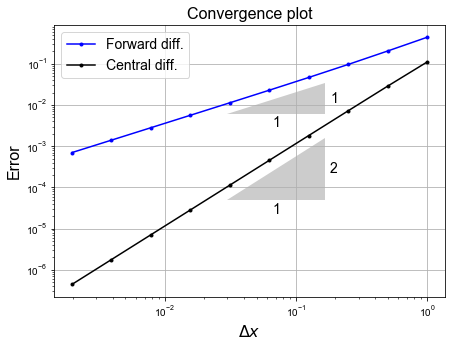

In [6]:
def forward_diff(f, x, dx):
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx


def central_diff(f, x, dx):
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)


# for this example we know trivially what the exact solution should be
exact = np.cos(0.8)

print('Exact derivative at sin(0.8) = ', exact)
# headers for the following errors outputs
print('%20s%40s' % ('Forward differencing', 'Central differencing'))

# we're going to store all the values for plotting, initialise variable for these
fd_errors = []
cd_errors = []
dx_all = []
dx = 1.0  # an initial mesh spacing
for i in range(10):
    fd = forward_diff(np.sin, 0.8, dx)
    cd = central_diff(np.sin, 0.8, dx)
    print('%10g (error=%10.2g)         %10g (error=%10.2g)' %
          (fd, abs(fd - exact), cd, abs(cd - exact)))
    # store the h and the errors
    dx_all.append(dx)
    fd_errors.append(abs(fd - exact))
    cd_errors.append(abs(cd - exact))
    dx = dx / 2  # halve h for the next iteration

# as we expect a polynomial relationship between dx and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
# slope 1 for forward diff and slope 2 for central diff

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_errors, 'b.-', label='Forward diff.')
ax1.loglog(dx_all, cd_errors, 'k.-', label='Central diff.')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)
annotation.slope_marker((3e-2, 6e-3), (1, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((3e-2, 5e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

## How small (or large) can $\Delta x$ go?

We see above that for a sensible variation in $\Delta x$ values our approximation gets more accurate as we make $\Delta x$ smaller, and that the orders of convergence agree with our analysis.

But what happens if we didn't choose quite so sensible a value for $h$?

Let's consider calculating $\;\;f'(-0.4)\;\;$ where $\;\;f(x):=\cos (x)$.

The exact solution is of course $\;\;f'(-0.4)=-\sin(-0.4)$. 

Let's write some code that uses the central difference to calculate this value, for a *very* wide range of $h$ values

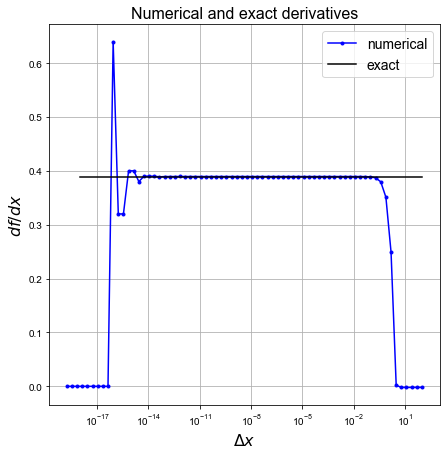

In [7]:
x0 = -0.4
exact_deriv = -np.sin(x0)
dx = 100.0 * .5**np.arange(0, 70)
cd = central_diff(np.cos, x0, dx)
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.semilogx(dx, cd, 'b.-', label="numerical")
ax1.semilogx([1e-18, 100], [exact_deriv, exact_deriv], 'k', label="exact")
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('${df}/{dx}$', fontsize=16)
ax1.set_title('Numerical and exact derivatives', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14);

### Observations


- Note first that this is a semi-log plot - log on the $x$ axis whereas the actual estimate of the derivative on the $y$ axis. The true solution is the black like and intermediate values of $\Delta x$ can all be seen to be providing reasonable estimates. 


- Too large a value for $\Delta x$ and we lose so much accuracy that the result is useless.  What is too large is a relative question and depends on the problem in question, e.g. what are the typical length or time scales of our function (equivalently of the problem we are trying to solve in the case of O/PDEs).


- For this simple problem there are a wide range of $\Delta x$ values that give accurate results.


- Too low a value for $\Delta x$ and we are hit with machine precision and round-off errors.


- In practice the lower limit is defined by the precision of our computer and code (e.g. single, double).  E.g. we can force Python to use single precision with the following and we note the location where we lose accuracy shifts substantially higher.

exact derivative in double precision:  0.3894183423086505
exact derivative in single precision:  0.38941833


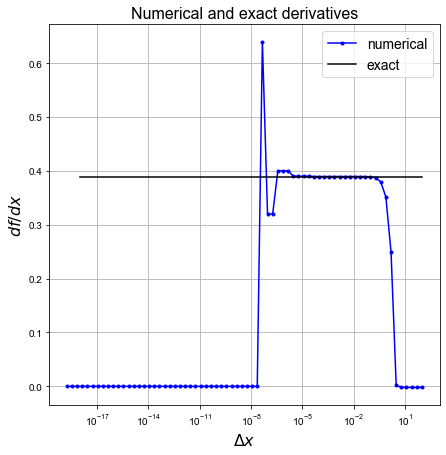

In [8]:
x0 = -0.4
exact_deriv = -np.sin(x0)
print("exact derivative in double precision: ", exact_deriv)
exact_deriv = -np.sin(x0, dtype=np.float32)
print("exact derivative in single precision: ", exact_deriv)

dx = 100.0 * .5**np.arange(0, 70, dtype=np.float32)


def fsp(x):
    return np.cos(x, dtype=np.float32)


cd = central_diff(fsp, x0, dx)
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.semilogx(dx, cd, 'b.-', label="numerical")
ax1.semilogx([1e-18, 100], [exact_deriv, exact_deriv], 'k', label="exact")
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('${df}/{dx}$', fontsize=16)
ax1.set_title('Numerical and exact derivatives', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14);

## Approximating second derivatives

Numerical differentiation may be extended to the second derivative by noting that the second derivative is the derivative of the first derivative. 

That is, if we define a new function $g$ where:

$$ g(x) = f'(x), $$

then

$$ f''(x) = g'(x), $$

a consequence of this (obvious) observation is that we can just apply our differencing formula twice in order to achieve a second derivative - first to estimate $g$, and then to use these estimates to approximate $g'=f''$

And so on for even higher  derivatives!

We have noted above that the central difference method, being second-order accurate, is superior to the forward difference method so we will choose to extend that.

In order to calculate $f''(x_0)$ using a central difference method, we first calculate $f'(x)$ for each of two half intervals, one to the left of $x_0$ and one to the right:

\begin{align*} 
f'\left(x_0+\frac{\Delta x}{2}\right) & \approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\\[10pt]
f'\left(x_0-\frac{\Delta x}{2}\right) & \approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x}.
\end{align*}

[NB. We make this choice since we have a vision to ultimately end up with an approximation that utilises a three-point stencil].

Of course the formula on the RHS of these two equations we recognise from above as first-order forward and backward differences, if we were to consider the derivatives on the LHS to be *evaluated at $x_0$*. 

However, by considering the LHS at $x_0\pm \Delta x/2$ they are in actual fact second-order *central* differences of these values, where the denominator of the RHS is $2\times (\Delta x/2)$.

[This may seem a bit weird, but is just showing that there are sometimes more than one way to interpret a numerical approximation].

We can now calculate the second derivative making use of these two values within another central difference. 

But we must note again that these two values are telling us $f'(x)$ at the points $x_0\pm{\Delta x}/{2}$, which are only $\Delta x$ rather than $2\Delta x$ apart. 
We must remember this in the denominator of the central difference formula to yield

\begin{align}
    f''(x_0)&\approx\frac{f'(x_0+\frac{\Delta x}{2})-f'(x_0-\frac{\Delta x}{2})}{\Delta x}\\[5pt]
    &\approx\frac{\frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}-\frac{f(x_0)-f(x_0-h)}{\Delta x}}{\Delta x}\\[5pt]
    &=\frac{f(x_0+\Delta x)-2f(x_0)+f(x_0-\Delta x)}{\Delta x^2}.
\end{align}

<br>

To reiterate, we now have a seond-order accurate approximation of a second derivative. However, to achieve this we need to *extend our stencil*, i.e. use values of our numerical solution at three rather than two locations.

<br>

<br>

Note that a way to formalise the above derivation of numerical approximations is the **method of undetermined coefficients** which we don't have time to go into.

# Introduction to BVPs

So now we know how to calculate various approximations to derivatives, let's try using this incormation to solve differential equations.

<br>

Let's start with a PDE model problem -- time-dependent advection-diffusion in one-dimension (1D):

$$\frac{\partial c}{\partial t} + U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2},$$

where $\,t\,$ is time, $\,x\,$ is our single space dimension. You can think of $\,c\,$ as being a concentration of some quantity which is being *advected* with prescribed velocity $\,U\,$, and *diffused* with the diffusivity $\,\kappa$.

[$U\,$ here is a scalar as we're in one spatial dimension but ultimately we'll be interested in the multi-dimensional case of course.]

<br>

**Exercise:** perform a dimensional analysis of this equation - what are the dimensions of $\,\kappa$?

<br>

Of course for this problem to be fully described we need to define the domain we are considering this problem over (including its boundaries in the case of a bounded problem) as well as initial and boundary conditions.

For the (space-time) domain let's assume we start at $\,t=0\,$ and as is typical with the time dimension we are unbounded, we write this as $\,t\in [0,\infty)$; in space let's assume we are bounded in $\,x\,$ left and right: $\,x\in [0,L]$.

<br>

*Initial condition* (this is a scalar first-order (in time) problem, as so we only need one):

$$c(x,0)=c^0(x).$$

<br>

*Boundary conditions* (this is second-order in space and so we need two conditions):

$$c(0,t) = 0, \;\;\;\; c(L,t)=c_E. $$

<br>

These are just examples of potential initial/boundary conditions, note in particular for initial simplicity we have assumed here *Dirichlet* boundary conditions. Notice that $\,c_E\ne 0\,$ precludes the simple solution $\,c\equiv 0$.


(Note that we might also consider problems where we are infinite in one of both spatial directions, in which case we can replace our *boundary conditions* by *far-field conditions*, e.g. $c\rightarrow 0$ as $x\rightarrow\infty$.)

## Problem non-dimensionalisation

This problem can be written in dimensionless form as

$$\frac{\partial \hat{c}}{\partial \hat{t}} + \frac{\partial \hat{c}}{\partial \hat{x}} = \frac{1}{Pe}\frac{\partial^2 \hat{c}}{\partial \hat{x}^2},$$

with initial/boundary conditions

$$\hat{c}(\hat{x},0) = \hat{c}^0(x), \;\;\;\; \hat{c}(0,\hat{t}) = 0, \;\;\;\; \hat{c}(1,\hat{t})=1. $$

$Pe$ is termed the Peclet number and is defined by 

$$Pe = \frac{UL}{\kappa},$$

where $L$ is the length scale used to non-dimensionalise the problem.

Note that $\,Pe\,$ is now the only parameter in our problem, which emphasises its importance both to the physics of the continuous problem as well as the discrete numerical system as we shall show.


When considering the problem in this non-dimensional form it is common to drop the hats.

## Model problem - BVP: steady-state advection-diffusion

Let's suppose for the moment that our problem is independent of time, 

e.g. we have assumed that we have moved forward in time far enough that we have reached a *steady state*, and we are starting our numerics from this point (or assumption). 

Later we will consider the full time-dependent case (which may of may not converge to a steady state!)

This means that we are in a situation where the advection and diffusion terms exactly balance one another, the problem has stopped evolving in time, and hence the time derivative is zero and can be dropped (this also means that the details of the initial condition are no longer important/of relevance, and are also dropped).

Of course $\,c\equiv 0\,$ is one example of such a situation, but we are really concerned with more interesting cases where forcing (from the boundary) precludes this simple solution. 

We are then left with the problem for $c\equiv c(x)$ (we drop the $t$ dependence here as we've stated the solution doesn't change with time):

$$\frac{\partial {c}}{\partial {x}} = \frac{1}{Pe}\frac{\partial^2 {c}}{\partial {x}^2},$$

with auxiliary conditions

$${c}(0) = 0, \;\;\;\; {c}(1)=1. $$

Note that now this is effectively just an ODE in $\,x\,$ (the solution only being a function of $x$: $\,c\equiv c(x)$).

It's second-order and so correctly we have two auxiliary conditions allowing us to determine a unique solution.

A differential equation problem such as this where conditions are given at all boundary locations, is termed a *boundary value problem* (BVP) (cf. IVPs where both "BCs" would be located at the same place).

The solution to this particular problem can be shown to be given by 

$$ c(x) = \frac{\exp\left(Pe \; x\right) - 1}{\exp(Pe) - 1}.$$

(In the dimensional case it would be $ c(x) = c_E\frac{\exp\left(Pe \frac{x}{L}\right) - 1}{\exp(Pe) - 1}$).

<br>

Let's plot this for different values of $\,Pe\,$ to start to get a feel how, for different physical parameters, this might be a challenging problem to solve numerically.

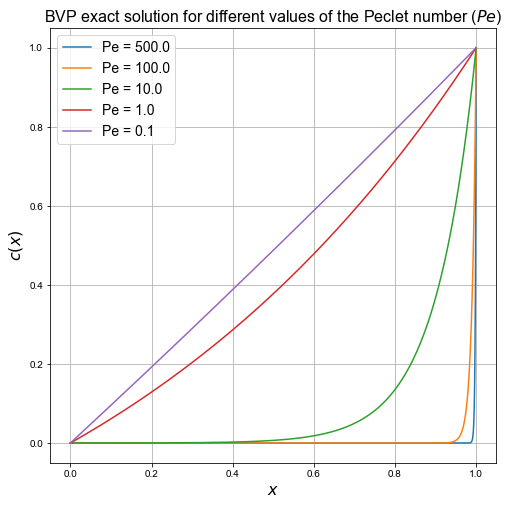

In [9]:
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$c(x)$', fontsize=16)
ax1.set_title('BVP exact solution for different values of the Peclet number ($Pe$)', fontsize=16)
x = np.linspace(0, 1, 1000)
for i, Pe in enumerate([500, 100, 10, 1, 0.1]):
    c = (np.exp(Pe * x) - 1) / (np.exp(Pe) - 1)
    ax1.plot(x, c, label='Pe = {:.1f}'.format(Pe))

ax1.grid(True)
ax1.legend(loc='best', fontsize=14);

### Observations

Recall that 

$$Pe = \frac{UL}{\kappa}.$$


- Note from the plot how the solution for low $Pe$ (the situation where diffusion dominates advection) the solution is nearly linear (think about why this makes sense from the underlying equation).


- Whereas for large $Pe$ (advection dominates diffusion) we get a very strong boundary layer at the right hand boundary.


- Which of these situations is going to be challenging for a numerical method to represent? Think about moving from the continuous world to a discrete numerical world (e.g. one where we need to represent quantities on finite meshes, especially where we use a uniform mesh spacing $\Delta x$).

## Methods for solving BVPs

There are two common approaches to solve problems such as this:


1. [*Shooting method*](https://en.wikipedia.org/wiki/Shooting_method) - discretise the problem on a finite spatial grid but then solve it like an IVP *'shooting'* out from one boundary to generate a trajectory in space, and varying the *initial* parameters at one boundary location until we find a trajectory that matches the conditions prescribed at the other location. Rather than simply using trial and error, we can formulate the problem as a nonlinear root-finding problem. 


2. We can also form a coupled spatial discretisation of the problem, and then use linear (or nonlinear) solvers to solve directly for the solution over all space. We will show examples of this approach now, with the assumption that our problems are linear and hence lead to a linear (i.e matrix) system which can be solved using methods touched on in a previous lecture.


We focus on approach 2 here since this is the one that can be generalised for the solution of time and spatially dependent PDE problems, whereas the first is somewhat specific to BVPs.

## Defining a grid (or mesh)

To solve this one dimensional BVP (using a linear algebra approach) we need to convert the continuous PDE into a discrete system to solve on a finite computer.

To do this we first define a discrete (i.e. a finite number of) mesh or grid of points at whose locations we will seek the solution.

To keep things simple for now we will assume these points are equally spaced, and we assume we use $N$ points to discretise our domain (recall in dimensional units this is $x\in[0,L]$).

To deal with the imposition of boundary conditions we will use an approach here where our $N$ *internal* mesh nodes are located within the domain, and we introduce two extra *ghost* nodes just outside the domain as in the figure below.

<img src="figures/1d_grid.svg" style="width: 800px">

As we shall see shortly these ghost nodes will be used to help impose our boundary conditions. 

<br>

We have ***made a choice*** here over the method we use to deal with our BCs - there are many other options! In particular, approaches where the first and last node coincide exactly with the boundary locations.

<br>

Since we will assume that we don't yet know anything about the expected solution behaviour it makes sense for our mesh of points to be equally spaced, or *equidistant*, i.e. we have a constant mesh spacing $\Delta x$.

Another way of saying this is that our mesh is *uniform*.

Our *interior* mesh points or solution nodes are therefore located at

$$x_i=\left(i-\frac{1}{2}\right)\Delta x, \;\;\;\;\textrm{for}\;\;\;\;  i=1,\ldots,N, \;\;\;\;\textrm{where}\;\;\;\; \Delta x = \frac{L}{N}.$$ 

## Dealing with Dirichlet boundary conditions

Recall that our BCs for this problem were specified in Dirichlet form:

$$c(0,t) = 0, \;\;\;\; c(L,t)=c_E. $$

Since we set up our mesh above such that $x=0$ was located exactly mid-way between the left most ghost node and the first interior node (and similarly at the right hand boundary) we can approximate the boundary conditions as

\begin{align}
x=0: & \;\;\;\; \frac{1}{2}(c_0 + c_1) = 0, \\[5pt]
x=L: & \;\;\;\; \frac{1}{2}(c_N + c_{N+1}) = c_E,
\end{align}

where $c_i$ is the numerical solution at node $i$. The above expressions are just using linear interpolation of course between the two nodes straddling the boundary location.

Note that if we perform a Taylor series approximation we will be able to see that these approximations at the boundaries are second-order accurate. This is good as it will agree with the order of accuracy of the ODE discretisation we will see shortly. 

Note that generally, too high an accuracy in approximating the BCs could be a waste of effort, but too low might compromise the overall accuracy of the solver throughout the entire domain!

## Solving the diffusion equation

Let's assume for simplicity that $U=0$ (i.e. we have no advection), then our BVP system: 

$$\kappa\frac{\partial^2 c}{\partial x^2}=0, \;\;\;\; c(0) = 0, \;\;\;\; c(L)=c_E,$$

can be approximated with the following discretisation, which here forms a system of algebraic equations

\begin{equation}
  \begin{cases}
\frac{1}{2}(c_0 + c_1) &= 0 \\[5pt]
\kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{h^2} &= 0 \\[5pt]
\frac{1}{2}(c_N + c_{N+1}) &= c_E
  \end{cases}
\end{equation}
for $i=1,2,\ldots,N$.


This can be written in matrix form as

$$\begin{pmatrix}
    \frac{1}{2} & \frac{1}{2} & 0 & \ldots & \dots  & 0 \\
    \frac{\kappa}{\Delta x^2} & -\frac{2\kappa}{\Delta x^2} & \frac{\kappa}{\Delta x^2} & \ddots & & \vdots \\
    0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
    0 & \ddots & \ddots & \ddots & \ddots & 0 \\
    \vdots &    & 0 &\frac{\kappa}{\Delta x^2} & -\frac{2\kappa}{\Delta x^2} & \frac{\kappa}{\Delta x^2} \\    
    0 & \ldots & \ldots & 0 & \frac{1}{2}  & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1\\
\vdots\\
\\
\vdots\\
c_N\\
c_{N+1}
\end{pmatrix} = 
\begin{pmatrix}
0\\
0\\
\vdots\\
\\
\vdots\\
0\\
c_E
\end{pmatrix},
$$

or

$$ A\boldsymbol{c}=\boldsymbol{b}, $$

from which the solution vector can be obtained 

$$\boldsymbol{c}=A^{-1}\boldsymbol{b}, $$

(although recall the comments from a previous where we noted that generally we don't want to solve systems in this way via explicit use of the inverse matrix).

Let's implement this method and plot the solution.

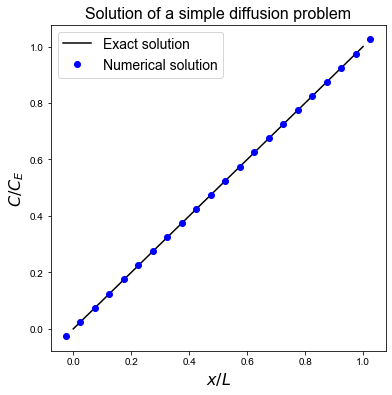

In [10]:
kappa = 0.005
L = 1
N = 20
dx = L / N
CE = 1
Pe = 10
U = Pe * kappa / L

x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
A = np.zeros((N + 2, N + 2))
b = np.zeros((N + 2, 1))

# construct the matrix entries for interior points
r = kappa / dx**2
for i in range(1, N + 1):
    A[i, i - 1] = r
    A[i, i] = -2 * r
    A[i, i + 1] = r
    b[i] = 0

# BC1
A[0, 0] = 0.5
A[0, 1] = 0.5
b[0] = 0

# BC2
A[N + 1, N] = 0.5
A[N + 1, N + 1] = 0.5
b[N + 1] = CE  # BC2

# solve system using "solve" rather than multiplying through by inverse 
# cf. comments from L3!!
C = np.linalg.solve(A, b)

# a fine mesh to plot the exact solution
xf = np.linspace(0, L, 1000)
# the exact solution for this case
Cex = xf / L * CE

# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Solution of a simple diffusion problem', fontsize=16)
ax1.legend(loc='best', fontsize=14);

# the following line masks out the ghost nodes
#ax1.set_xlim([0,1])

### Observations


- Note in the figure above we plot the solution at all mesh points, including the ghost nodes outside the domain.  This is emphasised through the fact that the exact solution is only plotted for $x\in[0,1]$. 


- We could of course have solved the diffusion only problem by integrating up the ODE twice analytically to yield the linear function $c(x) = Ax + B$ for constants of integration $A$ and $B$, and then use the two boundary conditions to fix these constants.


So ultimately diffusion alone as a BVP wasn't very interesting. Things get a lot more complicated and interesting (physically AND numerically) when we add back in advection!

# The time-independent (steady) advection-diffusion problem

Let's return to the full (steady state) advection-diffusion problem

$$U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, \;\;\;\; c(0) = 0, \;\;\;\; c(L)=c_E, $$

and let's assume we have a three point stencil to play with:

<img src="figures/Adv-Diff_1D_centred_stencil.svg" style="width: 500px">

the blue point indicates that we are going to form a discretisation at node $i$.


## Discretisation choices for advection and diffusion

The most obvious choice for diffusion is just to use the second-order central scheme we discussed and implemented above:

$$ \left.\kappa\frac{\partial^2 c}{\partial x^2}\right|_{x_i} \approx \kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{\Delta x^2}.$$

The fact that this is second-order accurate motivates us to attempt to use the same order of accuracy discretisation for the advection term. 

The advection term involves a first derivative, and we know from earlier that a central difference of a first derivative is second-order accurate (whereas forward and backward are only first-order accurate).

So a sensible discretisation choice would seem to be

$$ \left.U\frac{\partial c}{\partial x}\right|_{x_i} \approx U\frac{c_{i+1} - c_{i-1}}{2\Delta x}.$$


We can combine these two discrete terms and update the set of algebraic equations we derived above for the diffusion only problem (note that the discretisation of the boundary conditions does not need to change here now that we have included advection - this won't always be the case):


\begin{equation}
  \begin{cases}
\frac{1}{2}(c_0 + c_1) &= 0 \\[5pt]
\kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{h^2} - U\frac{c_{i+1} - c_{i-1}}{2\Delta x} &= 0 \\[5pt]
\frac{1}{2}(c_N + c_{N+1}) &= c_E
  \end{cases}
\end{equation}
for $i=1,2,\ldots,N$.

(To keep things looking like the earlier diffusion problem we have considered the BVP in the form $\kappa\frac{\partial^2 c}{\partial x^2}-U\frac{\partial c}{\partial x}=0$, we could multiply through by a minus sign here, and in the corresponding set of algebraic equations, and it would change nothing about our discretisation and the corresponding numerical solution.)


This can be written in matrix form as


$$\begin{pmatrix}
    \frac{1}{2} & \frac{1}{2} & 0 & \ldots & \dots  & 0 \\
    \left\{\frac{\kappa}{\Delta x^2} + \frac{U}{2\Delta x}\right\} & \left\{-\frac{2\kappa}{\Delta x^2}\right\} & \left\{\frac{\kappa}{\Delta x^2} - \frac{U}{2\Delta x}\right\} & 0 & & \vdots \\
    0 &  &  & \ddots &  & \vdots \\
    \vdots &  &  &  &  & 0 \\
      &    & 0 &\left\{\frac{\kappa}{\Delta x^2} + \frac{U}{2\Delta x}\right\} & \left\{-\frac{2\kappa}{\Delta x^2}\right\} & \left\{\frac{\kappa}{\Delta x^2} - \frac{U}{2\Delta x}\right\}\\    
    0 & \ldots & \ldots & 0 & \frac{1}{2}  & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1\\
\vdots\\
\\
\vdots\\
c_N\\
c_{N+1}
\end{pmatrix} = 
\begin{pmatrix}
0\\
0\\
\vdots\\
\\
\vdots\\
0\\
c_E
\end{pmatrix}
$$

which again can be considered in the form $\, A\boldsymbol{c}=\boldsymbol{b}\, $ with solution 
$\,\boldsymbol{c}=A^{-1}\boldsymbol{b} $.


Let's implement this method and see what difference the inclusion of advection makes to the (numerical) solution.


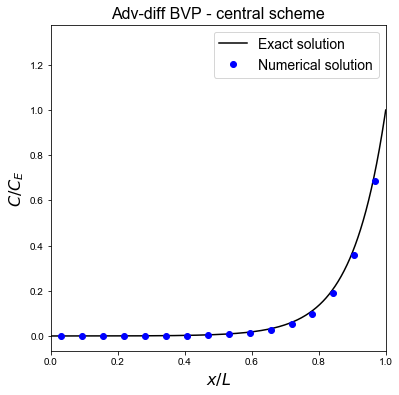

In [11]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


# call function to generate numerical solution
x, C = BVP_AD_central(L, U, kappa, CE, 16)

# construct the exact solution
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-diff BVP - central scheme', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

### Observations


- In this plot we have restricted the $x$ limits to the physical domain and so not plotted the ghost node solutions.


- The result looks pretty good, but let's check for robustness (a.k.a. stability) and the impact that changing the problem or the mesh resolution has.


- For this problem in non-dimensional form changing $Pe$ and $\Delta x$ is actually equivalent - it's a more challenging problem if we either make $Pe$ larger (as the boundary layer will get thinner relative to the mesh spacing), or if we make $\Delta x$ larger.  Let's experiment with the latter by solving the same problem in a series of coarsening meshes.

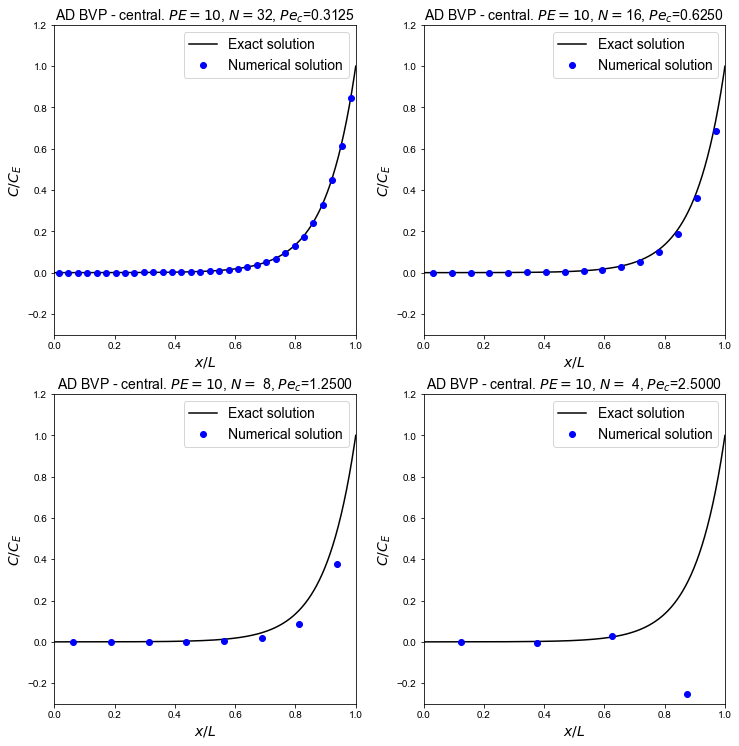

In [12]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

# set up figure with 4 subplots to plot 4 resolutions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# reshape so that we can iterate below over axs[i] instead of ax[i,j]
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=4)

# construct the exact solution on a fine mesh
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# let's compute solution and plot for 4 different resolutions
for (i, N) in enumerate( (32 * .5**np.arange(0, 4)).astype(np.int) ):
    # call function to generate numerical solution
    x, C = BVP_AD_central(L, U, kappa, CE, N)
    axs[i].plot(xf, Cex, '-k', label='Exact solution')
    axs[i].plot(x, C, 'ob', label='Numerical solution')
    axs[i].set_xlabel('$x/L$', fontsize=14)
    axs[i].set_ylabel('$C/C_E$', fontsize=14)
    axs[i].set_title('AD BVP - central. $PE = 10$, $N=$%2i, $Pe_c$=%.4f' % (N,U*(L/N)/kappa), fontsize=14)
    axs[i].legend(loc='best', fontsize=14)
    # to exclude ghost points just restrict the x limit of the plot
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(-0.3, 1.2);

### More observations


- For the first three resolutions we see the accuracy decreasing as we decrease the mesh resolution - this make sense based on our Taylor series error analysis earlier (indeed as we know the overall scheme should be second-order accurate we would expect an approximately four times increase in error every time we double the mesh spacing).


- But something qualitatively different has happened for the coarsest mesh resolution that we have considered - the numerical solution in the bottom-right frame now has spuriously jumped down (and note to a negative value) close to (or within) the boundary layer.


- This is a consequence of not having enough resolution to resolve the rapid change in the solution at this location.


- This behaviour can be referred to as instability, resulting in wiggles, oscillations, under/over-shoots, ...


- Note that we have also included a new quantity (the ***grid or cell Peclet number***) in the figure titles. It is defined as:

$$Pe_c :=  \frac{U\Delta x}{\kappa}.$$


- Theory states that the central scheme (for advection) is prone to instability (the presence of wiggles or over/under-shoots) when the grid Peclet number exceeds the value 2 - which is consistent with our plots above.


- NB. a grid Peclet number exceeding 2 does not mean we will definitely get wiggles, just that we may - we cannot rule them out.

## Upwind for advection

An alternative means to discretise advection would be to use either a forward or backward difference to approximate the first-order derivative in the advection term.

<img src="figures/Adv-Diff_1D_centred_stencil.svg" style="width: 500px">

If we think about the direction of information propagation via advection (i.e. in the direction of the velocity $U$ - which in 1D just means whether $U$ is positive or negative) this gives us a clue as to whether we should use a forward or a backward difference:

if $U$ is positive then information is travelling, or being "advected" to the right, this means at node $i$ we want to make use of the numerical solution to the left (and vice-versa). Think about crossing the road, which direction do you look?


$$ \left.U\frac{\partial c}{\partial x}\right|_{x_i} \approx
  \begin{cases}
 U\frac{c_{i} - c_{i-1}}{\Delta x}\;\;\;\;\text{if} \;\;\;\; U>0 \;\;\;\;\text{(backward difference)}\\[5pt]
 U\frac{c_{i+1} - c_{i}}{\Delta x}\;\;\;\;\text{if} \;\;\;\; U<0\;\;\;\;\text{(forward difference)}
  \end{cases}
$$


This approach is called an ***upwind*** discretisation of advection.

It seeks to do justice to the fact that for advection problems information travels in the *downstream* direction.

Hence, the advection operator is skewed towards the upstream direction to better approximate the flow of information - imagine standing in a river, it's only the water travelling towards us that is affecting us.

However, this scheme is only first-order accurate, and as we shall see it suffers from numerical diffusion/dissipation. 

We shall witness both these points now through an implementation of the upwind scheme and plots of the comparison with solutions obtained with the central scheme (for both advection and diffusion).

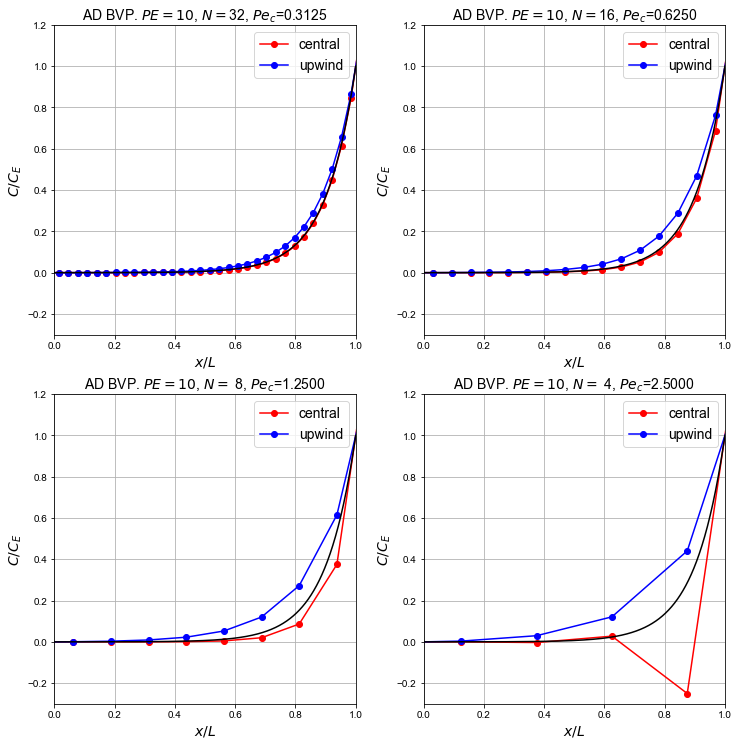

In [13]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1


def BVP_AD_upwind(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff - r_adv
        A[i, i + 1] = r_diff
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


# set up figure with 4 subplots to plot 4 resolutions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# reshape so that we can iterate below over axs[i] instead of ax[i,j]
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=4)

# construct the exact solution on a fine mesh
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# let's compute solution and plot for 4 different resolutions
for (i, N) in enumerate((32 * .5**np.arange(0, 4)).astype(np.int)):
    # call function to generate numerical solution
    x, C = BVP_AD_central(L, U, kappa, CE, N)
    axs[i].plot(x, C, 'ro-', label="central")
    x, C = BVP_AD_upwind(L, U, kappa, CE, N)
    axs[i].plot(x, C, 'bo-', label="upwind")
    axs[i].plot(xf, Cex, 'k')
    axs[i].set_xlabel('$x/L$', fontsize=14)
    axs[i].set_ylabel('$C/C_E$', fontsize=14)
    axs[i].set_title(
        'AD BVP. $PE = 10$, $N=$%2i, $Pe_c$=%.4f' % (N, U*(L/N)/kappa), fontsize=14)
    axs[i].legend(('numerical', 'exact'), loc='best', fontsize=14)
    # to exclude ghost points just restrict the x limit of the plot
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(-0.3, 1.2)
    axs[i].grid(True)
    axs[i].legend(loc='best', fontsize=14)

### Observations


- The bad news is that as expected the upwind scheme is less accurate, and relatively speaking this gets worse as the resolution is changed due to the first-order vs second-order accuracy of the two schemes [see homework exercise].


- This manifests itself through enhanced (i.e. higher levels of) *numerical diffusion* with upwind methods, which can be particularly seen in it artificially thickening the width of the boundary layer, or equivalently limiting how fast the numerical solution can vary between grid points.


- The good news of course is that the scheme is stable (does not suffer from wiggles or undershoots) even when the mesh is very coarse (you could try coarsening it even further!) and the central scheme has gone unstable.

<br>


- **Important point:** What's the worse situation: (a) instability and obviously a solution we shouldn't make use of; or (b) a stable but potentially inaccurate result? In many ways (a) is "cleaner" - instability tells us we are asking too much of the simulation and we either need to use more resources (bigger computer or a longer runtime) or scale back our ambitions, but sometimes neither of these things is possible. Then we need to resort to (b), but this is only safe to do if we are aware and understand (and better yet can quantify) the consequences of the limitations to the method. Problems arise when people follow option (b) blindly, with no appreciation of the issues related to spurious numerical behaviour such as the numerical diffusion we've seen here.

<div class="optional">

## Analysis of the upwind scheme [$\star$]

Returning to our Taylor series derivations of the different finite difference approximations above, specifically where we wrote

$$ \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x} = f'(x_0) - \frac{\Delta x}{2} f''(x_0) + \mathcal{O}(\Delta x^2), $$

we can conclude that

$$ U\frac{c_i-c_{i-1}}{\Delta x} = Uc'_i - U\frac{\Delta x}{2} c''_i + \mathcal{O}(\Delta x^2).$$

Hence the leading order part of the *truncation error* between the exact and the (upwind) numerical representation of the advection term is

$$ Uc'_i - U\frac{c_i-c_{i-1}}{\Delta x} \approx  \frac{U\Delta x}{2} c''_i,$$

which qualitatively represents a diffusion-like term with a diffusivity coefficient of:

$$\kappa_{\text{num}} := \frac{U\Delta x}{2}.$$

This analysis of the leading order term in the error tells us that the numerical solution acts like the exact solution but with an error whose dominant component acts like diffusion - note that more generally this type of analysis is called a ***modified equation analysis*** and is useful in understanding the qualitative behaviour of different discretisations.  It tells us about an ODE/PDE that our numerical solution is actually in better agreement with than the actual problem we are trying to solve!!  
    
In this particular case our numerics are closer to the exact solution of a modified problem with extra diffusion!!

Note that the ratio of this numerical diffusion to the real physical diffusion is

$$\frac{\kappa_{\text{num}}}{\kappa} = \frac{U\Delta x}{2\kappa} = \frac{1}{2} Pe_c,$$

where 

$$Pe_C := \frac{U\Delta x}{\kappa},$$ 

is the grid or cell Peclet number we introduced above.

This new non-dimensional quantity can therefore be interpreted as telling us about the ratio of real to spurious diffusion in our upwind numerical solution.  

We clearly want the spurious numerical diffusion to be small in comparison to the true physical diffusion (otherwise we'd be essentially solving a completely different physical problem where the numerical diffusion would overwhelm the true diffusion), and so for accuracy we really require that 

$$ Pe_c \ll 1. $$

If $Pe_c$ approaches or even passes unity then the upwind scheme would be stable and give us a result, but it would potentially be completely wrong, especially in terms of representing phenomena where the mesh is too coarse to resolve rapid variations which may be present in the true solution.

Note that the stability limit of the cell Peclet number equalling two is the case where the ratio of real to spurious diffusion is one - i.e. the sizes of these two sources of diffusion in the solution are equivalent. Note that as we *additionally* include a discretisation of the physical diffusion in our problem this means that our overall discretisation is "double counting" diffusion - hence the reasons that in the example above our upwind solution is always too diffuse.

</div>

## Practicalities!

**Repeating what was said above (because it's very important):** 

***This is a very important point to remember - stability is of course a good thing, but it can lull you into a false sense of security as you can obtain a solution essentially to a different problem with very different qualitative and quantitative behaviour compared to the true solution.***

Just because you get a solution out of a model and it looks well-behaved (and perhaps even plausible based on what you know of the underlying physics), you cannot assume that it is accurate, especially if the solver makes use of inherently stable discretisation methods such as an upwind scheme - there is often no getting around the need for resolution (although subgrid scale parameterisations such as turbulence models do attempt to do this and very sophisticated/successful approaches have been developed, we won't have time to go into these in this module).

# The time-dependent (unsteady) advection-diffusion problem

Let's return to the PDE problem we introduced previously - unsteady (or time-dependent) [*advection-diffusion* (or sometimes *convection-diffusion*)](https://en.wikipedia.org/wiki/Convection%E2%80%93diffusion_equation) in one-dimension (1D):

$$\frac{\partial c}{\partial t} + U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, $$

where $t$ is time, $x$ is our single space dimension, you can think of $c$ as being a concentration of some quantity which is being *advected* with prescribed velocity $U$ (a scalar as we're in one spatial dimension), and *diffused* with the diffusivity $\kappa$ ("kappa").

To fully prescribe this problem we need an initial condition:

$$c(x,0)=c^0(x),$$

where $c^0(x)$ is a prescribed function of the spatial coordinate only, and we use superscripts to indicate a location in time (we will assume the initial time we start our simulations at is $t=0$, but any choice could be made).

To fully describe our problem we need to also prescribe boundary conditions, for example in this lecture we will consider the Dirichlet conditions we saw earlier:

$$c(0,t) = 0, \;\;\;\;\;\; c(L,t)=c_E. $$


<br>

[Remember only a first derivative in time means we need one initial condition, while seccond order derivatives in space means we need two boundary conditions.]

<br>

[Note that an alternative would be to introduce the concept of periodic BCs ]

<br>

For the (space-time) domain let's assume we start at $t=0$ and as is typical with the time dimension we are unbounded, we write this as $t\in [0,\infty)$; in space let's assume we are bounded in $x$ left and right: $x\in [0,L]$.

Earler we simplified this into an ODE problem where $x$ was the only independent variable - a BVP - by assuming that we were at steady state and hence that the time derivative could be ignored.

<div class="optional">

## The equation in higher spatial dimensions [$\star$]

Note that in higher dimensions the equation takes the form

$$\frac{\partial c}{\partial t} + \nabla\cdot (\boldsymbol{U}\, c) = \nabla\cdot(\kappa\nabla c), $$

where now $\boldsymbol{U}$ is a velocity *vector* and $\kappa$ is a diffusivity *tensor*.

Note that the equation written in this way is in what is called *conservative form* as it is equivalent to

$$\frac{\partial c}{\partial t} + \nabla\cdot X = 0, $$

where 

$$ X := \boldsymbol{U}\, c - \kappa\nabla c, $$

is a flux (here made up of "advective flux" and "diffusive flux" components).

Sometimes in numerics it is highly advantageous to consider problems in conservative form (this is the basis for the **finite volume method**).  

In the case that $\kappa$ is uniform in space, and $\boldsymbol{U}$ is divergence-free, then this equation is equivalent to the *advective form*:

$$\frac{\partial c}{\partial t} + \boldsymbol{U}\cdot \nabla c = \kappa\nabla^2 c. $$

[It's really the form the advective term takes that determines whether the equation can be described as being in conservative or advective (non-conservative) form].

Notice that it's essentially the 1D version of this equation in advective form that is our model problem this lecture.

</div>

## Non-dimensionalisation

Recall that the non-dimensional form of this problem could be written as

$$\frac{\partial \hat{c}}{\partial \hat{t}} + \frac{\partial \hat{c}}{\partial \hat{x}} = \frac{1}{Pe}\frac{\partial^2 \hat{c}}{\partial \hat{x}^2},$$

with initial/boundary conditions

$$\hat{c}(\hat{x},0) = \hat{c}_0(x), \;\;\;\;\;\; \hat{c}(0,\hat{t}) = 0, \;\;\;\;\;\; \hat{c}(1,\hat{t})=1. $$

where 

$$ Pe = \frac{UL}{\kappa}, $$ 

is the [Peclet number](https://en.wikipedia.org/wiki/P%C3%A9clet_number) which described the relative importance of advection to diffusion. 


## The Method of Lines

The idea behind the method of lines is to first discretise in space, but not in time (hence this is sometimes called a ***semi-discretisation***, and the result a *semi-discrete system*).

The idea underlying this is to both decouple how we deal with space and time, but also to allow us to make use of ODE system solvers such as those we considered in earlier lectures (e.g. RK4 or `scipy.integrate.solve_ivp`).

The discretisation in space can be performed using any method, e.g. the **finite difference** method, the **finite volume** method, the **finite element** method, etc. 

[FV and FE methods will be introduced in the module Modelling and Numerical Methods].

This method produces a **system of coupled ODEs (IVPs)** which can be solved using standard time-integration schemes.

Schematically the idea can be presented as follows

<img src="figures/MoL_schematic.svg" style="width: 600px">

### Defining a spatial grid

To discretrise in space we can proceed as we did for BVPs and first define a spatial mesh. 

There are lots of ways we can deal with boundaries and boundary conditions, but initially let's consider the ghost node approach and hence make use of the spatial mesh we defined in the BVP section:


<img src="figures/1d_grid.svg" style="width: 800px">


Where our mesh points or nodes in space are equally spaced and located at

$$x_i := \left(i-\frac{1}{2}\right)\Delta x, \;\;\;\;\;\; \textrm{for}\;\;\;\;\;\;  i=0,\ldots,N+1, \;\;\;\;\textrm{where}\;\;\;\; \Delta x = \frac{L}{N}.$$ 

## Discretising in space

Let's start from something we did with the BVP problem - using central differences in space for both advection and diffusion (remembering that there are potential stability concerns with the use of a central difference for advection!!).

<br>

Considering the PDE at location $x_i$, we can discretise in space to give

$$ \frac{\partial c_i}{\partial t} + U\frac{c_{i+1} - c_{i-1}}{2\Delta x}  = \kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{\Delta x^2}
\;\;\;\;\;\;\; \text{or} \;\;\;\;\;\;\;
\frac{\partial c_i}{\partial t} = \kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{\Delta x^2} - U\frac{c_{i+1} - c_{i-1}}{2\Delta x}  , $$


where we recall  that the spatial truncation error with this discretisation is $\mathcal{O}({\Delta x^2})$. 

In this notation $c_i$ is now a function of $t$ and represents an approximation to the value of the dependent variable at location $x_i$, i.e.


$$c_i \equiv c_i(t) \approx c(x_i,t). $$

<br>

This (semi-) discretisation defines an ODE for $c_i(t)$ which depends on $c_{i-1}(t)$ and $c_{i+1}(t)$, for every $i\in\{1,2,\ldots,N\}$.

It is thus a *coupled* ODE *system*, and you can perhaps now see how it is possible to get a very large system to solve - recall discussions on storage vs cost of function evaluations factoring in on what time-stepping scheme to choose.,

NB. Our problem contains second-derivatives in space and first-derivatives in time. This tells us we need two boundary conditions and one initial condition.

### Including Dirichlet boundary conditions

We need to consider appropriate boundary conditions for this problem, and here for simplicity we can initially just use exactly the same discretised boundary conditions as we did when we considered the corresponding BVP:

\begin{align}
x=0: & \;\;\;\; \frac{1}{2}(c_0 + c_1) = 0, \\[5pt]
x=L: & \;\;\;\; \frac{1}{2}(c_N + c_{N+1}) = c_E,
\end{align}

for a given value $c_E$.

### The initial condition

To fully specify the (here first-order) ODE problem we need an initial condition.  This is provided by evaluating the initial condition for the PDE at the $x_i$ locations:

$$c_i(t=0)\equiv c_i^0:=c^0(x_i),$$

where $c^0$ is a given function of space only.

Recall that we will be using subscripts to indicate discrete spatial locations, and superscripts to indicate time levels.

### The (semi-) discretised system

Our ***semi-discretised system*** thus takes the form

\begin{equation}
  \begin{cases}
\frac{1}{2}(c_0 + c_1) &= 0 \\[5pt]
\frac{\partial c_1}{\partial t}  & = \kappa\frac{c_{2} - 2c_1 + c_{0}}{\Delta x^2} -  U\frac{c_{2} - c_{0}}{2\Delta x} \\[5pt]
\vdots \\[5pt]
\frac{\partial c_N}{\partial t}  & = \kappa\frac{c_{N+1} - 2c_N + c_{N-1}}{\Delta x^2} -  U\frac{c_{N+1} - c_{N-1}}{2\Delta x} \\[5pt]
\frac{1}{2}(c_N + c_{N+1}) &= c_E,
  \end{cases}
\end{equation}


[It's really just a matter of style if we use ${\partial c_i}/{\partial t}$ or ${d c_i}/{d t}$ here since recall that $c_i \equiv c_i(t)$ - i.e. we only now have time as a proper independent variable.]

At the moment this system comprises $N$ coupled ODEs, coupled to two algebraic conditions representing the two boundary conditions.

A general ODE solver won't necessarily be able to deal with the algebraic conditions, as they are likely set-up to solve systems given in the form

$$\frac{d{\boldsymbol{c}}}{dt} = \boldsymbol{f}\,(t,\boldsymbol{c}(t)),\;\;\;\;\;\; \boldsymbol{c}\,(0)=\boldsymbol{c}^0.$$

<br>

[Note that ***differential-algebraic equation (DAE) solvers*** do exist (e.g. *DASSL*: <https://www.osti.gov/biblio/5882821-description-dassl-differential-algebraic-system-solver>), we just won't consider them here].

<br>


However, we can convert this into a system of $N+2$ coupled ODEs fairly easily.  

To achiece this, let's first differentiate the semi-discrete boundary conditions in time:

\begin{align}
\frac{1}{2}(c_0 + c_1) &= 0 \;\;\;\;\implies\;\;\;\; \frac{1}{2}\left(\frac{d c_0}{d t} + \frac{d c_1}{d t}\right) = 0, \\[5pt]
\frac{1}{2}(c_N + c_{N+1}) &= c_E \;\;\;\;\implies\;\;\;\; \frac{1}{2}\left(\frac{d c_N}{d t} + \frac{d c_{N+1}}{d t}\right) = \frac{d c_E}{d t}.
\end{align}

For simplicity here we will assume that our boundary condition $c_E$ is constant in time and so the RHS of the second equation is also zero, this could easily be generalised.

We therefore have two extra ODEs for the two ghost nodes. 

They're not at the moment quite in the simple form $\frac{d{\boldsymbol{c}}}{dt} = \boldsymbol{f}\,(t,\boldsymbol{c}(t))$, but we will see below how we deal with this.

Being ODEs we do of course need corresponding initial conditions. We know that we want the BCs to hold at all time levels, and so we can just evaluate the BC at the initial time (which we assume it $t=0$) to yield

\begin{align}
\frac{1}{2}(c_0(t=0) + c_1(t=0)) &= 0 \;\;\;\;\implies\;\;\;\; c_0^0 = -c_1^0, \\[5pt]
\frac{1}{2}(c_N(t=0) + c_{N+1}(t=0)) &= c_E \;\;\;\;\implies\;\;\;\;  c_{N+1}^0 =  2c_E - c_N^0.
\end{align}

## The semi-disrete matrix system

Now that we've dealt with the BCs, the semi-discrete ODE system can be written as

$$M \, \frac{d\boldsymbol{c}}{dt} = B \, \boldsymbol{c},$$

where

\begin{align}
\boldsymbol{c} & := \begin{pmatrix}
c_0\\
c_1\\
\vdots\\
c_N\\
c_{N+1}
\end{pmatrix},
\;\;\;\;\;\;\;\;\;\;\;\;
M := \begin{pmatrix}
    \frac{1}{2} & \frac{1}{2} & 0 & \cdots & \cdots  & 0 \\
    0 & 1 & 0 & \ldots &   & 0 \\    
    \vdots &  &  & \ddots &   & 0 \\  
       &  &  & 0  &  1 & 0 \\  
    0 & \cdots &  & 0 & \frac{1}{2}  & \frac{1}{2}
\end{pmatrix},
\\[10pt]
B & := \begin{pmatrix}
    0 & 0 & 0 & \ldots & \dots  & 0 \\
    \left\{r_{\text{diff}} + r_{\text{adv}}\right\} & \left\{-2r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & & \vdots \\
    0 & \ddots & \ddots & \ddots &  & \vdots \\
    \vdots &  &  &  &  & 0 \\
      &  & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-2r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\}\\    
    0 & \ldots & \ldots & 0 & 0  & 0
\end{pmatrix},
\end{align}

and we have used the shorthand notation

$$r_{\text{adv}} := \frac{U}{2\Delta x}, \;\;\;\;\;\;\;\; r_{\text{diff}} := \frac{\kappa}{\Delta x^2}.$$

The matrix $M$ is present here because of the form of our BCs.

This isn't quite in the form we need for a general ODE solver, but this is easily rectified by simply multiplying through by the inverse of $M$:


$$\frac{d\boldsymbol{c}}{dt} = M^{-1} \, B \, \boldsymbol{c},$$

which is in the form 

$$\frac{d\boldsymbol{c}}{dt} = A \, \boldsymbol{c},$$

where $A := M^{-1} \, B$.

Let's form these spatial discretisation matrices for a small problem to check what they look like.

In [4]:
# physical parameters
Pe = 5
L = 1
U = 1
CE = 1
kappa = 1/Pe

# define spatial mesh
N = 5
dx = L / N
x = np.linspace(-dx / 2, dx / 2 + L, N + 2)

# find the RHS discretisation matrices

# define first the parameters we defined above
r_diff = kappa / dx**2
r_adv = 0.5 * U / dx

# and use them to create the B matrix - recall zeros on the first and last rows
B = np.zeros((N + 2, N + 2))
for i in range(1, N + 1):
    B[i, i - 1] = r_diff + r_adv
    B[i, i] = -2 * r_diff
    B[i, i + 1] = r_diff - r_adv

# create M matrix - start from the identity
M = np.eye(N + 2)
# and fix the first and last rows
M[0,(0,1)] = [0.5, 0.5]
M[-1,(-2,-1)] = [0.5, 0.5]   
    
# find A matrix
A = np.linalg.inv(M) @ B

print('B = ')
pprint(B)
print('\nM = ')
pprint(M)
print('\nA = ')
pprint(A)

B = 
array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  7.5, -10. ,   2.5,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   7.5, -10. ,   2.5,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   7.5, -10. ,   2.5,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   7.5, -10. ,   2.5,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   7.5, -10. ,   2.5],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ]])

M = 
array([[0.5, 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0.5]])

A = 
array([[ -7.5,  10. ,  -2.5,   0. ,   0. ,   0. ,   0. ],
       [  7.5, -10. ,   2.5,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   7.5, -10. ,   2.5,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   7.5, -10. ,   2.5,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   7.5,

Let's turn the assembly of the RHS discretisation matrix ($A$) into a function for use later.

In [5]:
def assemble_adv_diff_disc_matrix_central(U, kappa, L, N):
    """ Function to form the spatial discretisation matrix for 
    advection-diffusion using central differences, given physical 
    parameters U and kappa and assuming a uniform mesh of N interior 
    nodes on the interval [0,L] with the ghost node approach.
    
    Returns the discretisation matrix A as well as the mesh x.
    """
    # define spatial mesh
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    # define first the parameters we defined above
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx

    # and use them to create the B matrix - recall zeros on the first and last rows
    B = np.zeros((N + 2, N + 2))
    for i in range(1, N + 1):
        B[i, i - 1] = r_diff + r_adv
        B[i, i] = -2 * r_diff
        B[i, i + 1] = r_diff - r_adv

    # create M matrix - start from the identity
    M = np.eye(N + 2)
    # and fix the first and last rows
    M[0,(0,1)] = [0.5, 0.5]
    M[-1,(-2,-1)] = [0.5, 0.5]   

    # find A matrix
    A = np.linalg.inv(M) @ B
    return A, x

## Discretising in time

We have a few options now. One is to just hand over this system to a "black box" ODE solver, the other is for us to take charge of the time-stepping task ourselves.

Firstly we prescribe a time step size $\Delta t$ which allows us to now define the "space-time mesh"

<img src="figures/space_time_stencil.svg" style="width: 600px">

where


\begin{align*}
x_i & := \left( i - \frac{1}{2}\right) \, \Delta x,   \;\;\;\;\textrm{for}\;\;\;\;  i=0,\ldots,N+1\\[5pt]
t^n & := n\,\Delta t \;\;\;\;\textrm{for}\;\;\;\;  n=0,1,\ldots
\end{align*}

### Forward Euler

Let's implement the simplest method we know - forward Euler.

And let's start from an initial condition given by the solution to the diffusion only problem (i.e. the linear solution joining the two BC values).

Pe_c: 0.12500
CFL: 0.04000
r: 0.32000


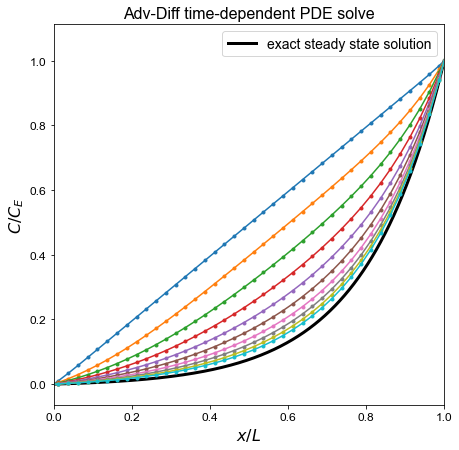

In [6]:
# physical parameters
Pe = 5
L = 1
U = 1
CE = 1
kappa = 1/Pe

# define number of points in spatial mesh (N+2 including ghose nodes)
N = 40

# use the function we just wrote to form the spatial mesh and the discretisation matrix 
A, x = assemble_adv_diff_disc_matrix_central(U, kappa, L, N)

# define a time step size
dt = 0.001

# and compute and print some key non-dimensional parameters - we'll explain these later
dx = L / N
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('CFL: {0:.5f}'.format(U*dt/dx))
print('r: {0:.5f}'.format(kappa*dt/(dx**2)))

# define the end time and hence some storage for all solution levels
tend = 1
# assume a constant dt and so can define all the t's in advance
t = np.arange(0, tend, dt)
# and we can also set up a matrix to store the discrete solution in space-time
# with our a priori knowledge of the size required.
C = np.empty((len(x),len(t)))

# define an initial condition - this one just linearly varies between the BC values, 
# i.e. 0 and 1 - this linear solution is also the steady state solution to the diffusion 
# only problem of course.
# Let's place this discrete solution in the first column of the C matrix which stores all solution levels
C[:,0] = CE * x / L

# now let's do the time-stepping via a for loop
# we will need the identity matrix so define it once outside the loop
I = np.eye(len(x))
for n in range(len(t)-1):
    C[:,n+1] = (I + A * dt) @ C[:, n]
    

# construct the exact solution to the **steady state** problem
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# set up figure
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-Diff time-dependent PDE solve', fontsize=16)
# plot the exact solution to the steady state version of problem
ax1.plot(xf, Cex, 'k', lw = 3, label = 'exact steady state solution')

# let's plot every 100th time level
for i in np.arange(5,len(t),100):
    ax1.plot(x, C[:,i], '.-')

ax1.legend(loc='best', fontsize=14)
# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

In [7]:
# create an animation

from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, xlim=(0, 1), ylim=(-0.1, 1.1),
                      xlabel='$x$', ylabel='$C$',
                      title='Advection-Diffusion - convergence to the steady state solution')
# if we don't close the figure here we get a rogue frame under the movie
plt.close()

ax1.plot(xf, Cex, 'k', lw=3, label='exact ss solution')
line, = ax1.plot([], [], 'b', lw=3, label='transient numerical solution')
time_text = ax1.text(0.78, 0.95, '', transform=ax1.transAxes)
ax1.legend(loc='upper left', fontsize=14)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    line.set_data(x, C[:, i])
    time_text.set_text('time = {0:.3f}'.format(i*dt))
    return line, time_text


number_frames = 100
frames = np.arange(0, C.shape[1], int(len(t)/number_frames))
anim = animation.FuncAnimation(fig, animate, frames,
                               interval=20, blit=True, init_func=init)

HTML(anim.to_jshtml())

### Observations


- We chose here to use the initial condition from the diffusion-only steady state problem, i.e. a linear function which passes through the two boundary values, in part since its simple and since it has a physical basis.


- The black line is the exact solution of the steady-state advection-diffusion problem we saw from the BVP section.


- We can see from above that this time-dependent PDE is an example of a case where the unsteady problem converges in time to the steady solution, i.e. the steady solution represents the long-term behaviour of the transient unsteady problem.


- We note also that this looks to be a stable solver ...

<br>

- **or at least we have selected numerical parameters that ensure that we remain stable - since we have used a central difference for advection and a forward Euler scheme in time (both of which we saw in previously were prone to going unstable unless we're careful over the choice of $\Delta x$ and $\Delta t$), this is indeed the case here.**

<br>

- **We will lose stability if we make either $\Delta x$ or $\Delta t$ too large (relative to the underlying physics of the problem) - you can experiment with these numerical parameters to confirm this, or equivalently play with the physical parameters such as $U$ or $Pe$ to make the problem more challenging - remember that whether or not $\Delta x$ or $\Delta t$ are sufficiently fine is a relative consideration which is dependent on the spatial and temporal scales of the problem, which here are governed by $U$ and $Pe$ (or $\kappa$)!**

<br>

- This is the cell Peclet number stability criteria for the steady state version of this problem from earlier - try implementing an solver that uses upwind for advection (see homework question).

## Example - advection-diffusion of a Gaussian

The previous problem was dominated by the boundary conditions.

Let's now consider a problem where a "blob" is advecting and diffusing in the interior of the domain, i.e. let's consider dynamics away from the boundaries.

Pe_c: 1.00000
CFL: 0.02000
r: 0.02000


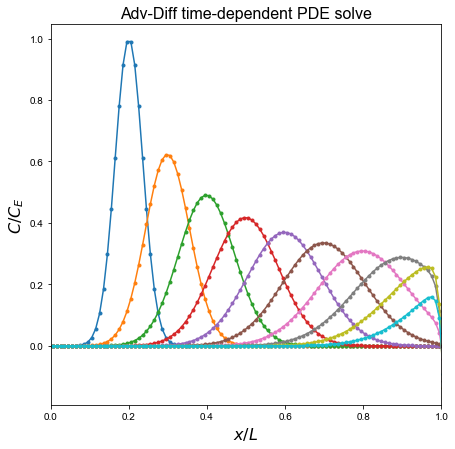

In [18]:
# physical parameters
Pe = 100
L = 1
U = 1
kappa = 1/Pe
# set the RHS boundary value to zero as well as the left
CE = 0


# define number of points in spatial mesh (N+2 including ghose nodes)
N = 100

# use the function we just wrote to form the spatial mesh and the discretisation matrix 
A, x = assemble_adv_diff_disc_matrix_central(U, kappa, L, N)

# define a time step size
dt = 0.0002

# and compute and print some key non-dimensional parameters
dx = L / N
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('CFL: {0:.5f}'.format(U*dt/dx))
print('r: {0:.5f}'.format(kappa*dt/(dx**2)))

# define the end time and hence some storage for all solution levels
tend = 1
# assume a constant dt and so can define all the t's in advance
t = np.arange(0, tend, dt)
# and we can also set up a matrix to store the discrete solution in space-time
# with our a priori knowledge of the size required.
C = np.empty((len(x),len(t)))

# define an initial condition - a "blob" in the shape of a Gaussian
# and place it in the first column of the C matrix which stores all solution levels
C[:, 0] = np.exp(-((x-0.2)/0.05)**2)

# now let's do the time-stepping via a for loop
# we will need the identity matrix so define it once outside the loop
I = np.eye(len(x))
for n in range(len(t)-1):
    C[:,n+1] = (I + A * dt) @ C[:, n]
    

# set up figure
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-Diff time-dependent PDE solve', fontsize=16)

# let's plot every 500th time level
for i in np.arange(0,len(t),500):
    ax1.plot(x, C[:,i], '.-')


# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

### Observations

- So the Gaussian is clearly advecting (translating to the right) and diffusing (getting shorter and fatter)!


- Something that looks a little strange (it is still physically meaningful) happens when it hits the boundary due to the constraint of the Dirichlet BCs.


- Next let's see how to implement *periodic BCs*. 

## Periodic boundaries

Periodic boundaries, or boundary conditions, are useful since they effectively mean we can run a simulation indefinitely without an externally imposed boundary condition (e.g. of Dirichlet or Neumann type) impacting on the result. Essentially what goes out one end automatically comes in the other!

So here for this advection diffusion example instead of using our Dirichlet boundary conditions in our disretisation matrix, now we want to effectively loop our domain.

We can thus do away with the ghost nodes which we used to allow us to formulate a finite difference expression at the boundary, and where needed instead of using these ghost nodes, use the appropriate nodal values from the other end of the domain. 

Topologically you can think of the mesh as being a circle.

Since we don't have/need the ghost nodes anymore, we locate our $N$ interior nodes such that the first and last correspond to the end point of our domain, i.e. we replace

```Python
x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
```
with
```Python
x = np.linspace(0, L, N)
```

What this means for our discrete system is that our old $B$ matrix of dimension ($N+2 \, \times \, N+2$, where $N$ was the number of internal nodes)

$$
B  := \begin{pmatrix}
    0 & 0 & 0 & \ldots & \dots  & 0 \\
    \left\{r_{\text{diff}} + r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & & \vdots \\
    0 & \ddots & \ddots & \ddots &  & \vdots \\
    \vdots &  &  &  &  & 0 \\
      &  & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\}\\    
    0 & \ldots & \ldots & 0 & 0  & 0
\end{pmatrix},
$$

where we hadn't yet included the boundary discretisation (which recall led to entries in the first and last column corresponding to the ghost nodes), can be generalised to the $N\times N$ matrix

$$
B  := \begin{pmatrix}
    \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & \ldots & \dots  & \left\{r_{\text{diff}} + r_{\text{adv}}\right\} \\
    \left\{r_{\text{diff}} + r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & 0 & & \vdots \\
    0 & \ddots & \ddots & \ddots &  & \vdots \\
    \vdots &  &  &  &  & 0 \\
      &  & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\} & \left\{r_{\text{diff}} - r_{\text{adv}}\right\}\\    
    \left\{r_{\text{diff}} - r_{\text{adv}}\right\} & \ldots & \ldots & 0 &\left\{r_{\text{diff}}+r_{\text{adv}}\right\} & \left\{-r_{\text{diff}}\right\}
\end{pmatrix}.
$$

As we'll be using discretisations of advection and diffusion in periodic domains multiple times below let's implement functions for these matrices individually.  Also note that in these examples we don't multiply through by the $r_{\text{adv}}$ and $r_{\text{diff}}$ factors inside the functions and so need to remember to do so outside.

In [19]:
def adv_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for advection
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (U / dx).
    """
    Dx = 0.5*np.eye(N, k=1) - 0.5*np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dx[0, -1] = -0.5
    Dx[-1, 0] = 0.5
    return Dx

def diff_central_periodic(N):
    """ Funtion to generate the NxN discretisation matrix for diffusion
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (kappa / dx**2).
    """
    Dxx = np.eye(N, k=1) - 2*np.eye(N) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dxx[0, -1] = 1.
    Dxx[-1, 0] = 1.
    return Dxx

The interior rows of these matrices clearly take the form


$$D_x = \begin{pmatrix}
     &  &  &  &    \\
     \ddots & \ddots & \ddots &  &    \\    
     & -1/2 & 0 & 1/2 &     \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     &  &  &  & 
\end{pmatrix}$$

and

$$D_{xx} = \begin{pmatrix}
     &  &  &  &    \\
     \ddots & \ddots & \ddots &  &    \\    
     & 1 & -2 & 1 &     \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     &  &  &  & 
\end{pmatrix}$$


Let's test these changes on the Gaussian problem and check that as the "blob" moves out of the right-hand boundary it comes back in at the left.

Pe_c: 0.20000
CFL:  0.10000
r:    0.50000


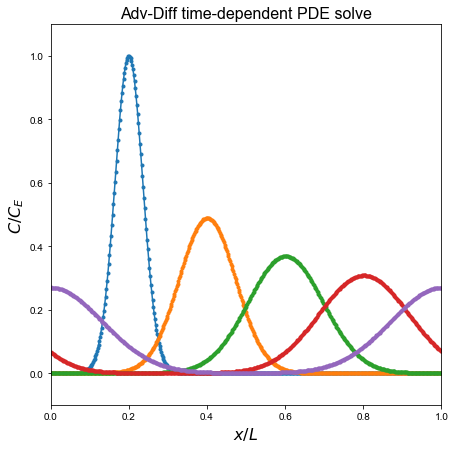

In [20]:
# physical parameters
Pe = 100
L = 1
U = 1
kappa = 1/Pe

# define spatial mesh
N = 500
dx = L / N
x = np.linspace(0, L, N)

# create discretisation matrix
Dx = adv_central_periodic(N)
Dxx = diff_central_periodic(N)
A = -(U / dx) * Dx + (kappa / dx**2) * Dxx

# define a time step size
dt = 0.0002

# this is a slightly larger dt value mentioned in the comments after the movie
#dt = 0.000201

# and compute and print some key non-dimensional parameters
dx = L / N
print('Pe_c: {0:.5f}'.format(U*dx/kappa))
print('CFL:  {0:.5f}'.format(U*dt/dx))
print('r:    {0:.5f}'.format(kappa*dt/(dx**2)))

# define the end time and hence some storage for all solution levels
tend = 1
# assume a constant dt and so can define all the t's in advance
t = np.arange(0, tend, dt)
# and we can also set up a matrix to store the discrete solution in space-time
# with our a priori knowledge of the size required.
C = np.empty((len(x),len(t)))
# define an initial condition - a "blob" in the shape of a Gaussian
# and place it in the first column of the C matrix which stores all solution levels
C[:, 0] = np.exp(-((x-0.2)/0.05)**2)

# now let's do the time-stepping via a for loop
# we will need the identity matrix so define it once outside the loop
I = np.eye(len(x))
for n in range(len(t)-1):
    C[:, n+1] = (I + A * dt) @ C[:, n]
    
# set up figure
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-Diff time-dependent PDE solve', fontsize=16)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)

for i in np.arange(0, len(t), int(len(t)/5)):
    ax1.plot(x, C[:, i], '.-')

In [21]:
# create an animation

from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, xlim=(0, 1), ylim=(-0.1, 1.1),
                      xlabel='$x$', ylabel='$C$',
                      title='Advection-diffusion of a Gaussian in a periodic domain')
# if we don't close the figure here we get a rogue frame under the movie
plt.close()

line, = ax1.plot([], [], 'b', lw=2)
time_text = ax1.text(0.78, 0.92, '', transform=ax1.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    line.set_data(x, C[:, i])
    time_text.set_text('time = %.3f' % (i*dt))
    return line, time_text


number_frames = 100
frames = np.arange(0, C.shape[1], int(len(t)/number_frames))
anim = animation.FuncAnimation(fig, animate, frames,
                               interval=50, blit=True, init_func=init)

HTML(anim.to_jshtml())

   
### Comments

- If you increase the time step size (even by just a tiny amount) in the case above you will see our simulation goes unstable as the $r$ parameter goes above 0.5. 


- Try a value of $\Delta t  = 0.00201$. Even though the still image is completely polluted by the later noise in the solution. Take a look at the corresponding movie to get an idea how the instability develops.


- Note that in this implementation we are storing the $C$ values at all time levels. This is useful for later plotting and for making movies, but might be too memory intensive. As this is a two time level scheme we only need to temporarily store the previous time level's solution. We could do this with something like

```Python
C = np.empty((len(x), 1))
# define an initial condition
C = np.exp(-((x-0.2)/0.05)**2)

for n in range(len(t)-1):
    C_prev = np.copy(C)
    C = (I + A * dt) @ C_prev
```


- Setting $U=0$ (or just not including the `Dx` matrix and corresponding function call) and you will see a solver for pure diffusion; similarly you can get an advection only solver by setting $\kappa=0$, although we know that this is likely to be unstable due to the infinite (cell) Peclet number and use of a central discretisation for advection. 

# Stability considerations (a summary)

So we hit a stability problem in the last example (when we made $\Delta t$ just a little larger). 

Given that we output three diagnostic quantities with each simulation above it may not be a surprise  that there are actually three "flavours" of stability we need to consider. There are three since there's quite a lot going on in this problem, compared to what we've seen in the IVP and the BVP parts of this module which effectively considered parts of the current problem in isolation.

Stability is a concept that essentially means that the inevitable discretisation errors that occur over a single time step or are localised to a single part of the spatial domain (e.g. in boundary layers we saw in the BVP section), do not "accumulate" or grow such that the quality and convergence of the overall numerical solve is compromised.

We'll now explain the three stability issues we need to be aware of in this context, and how to manage them.

## Cell Peclet number

We know from our work on BVPs that an issue with mesh sizes comes when we are dealing with a central difference for advection, and the solution varies substantially over a small distance, e.g. in a boundary layer, or simply a concentration type field with sharp changes in solution value.

Previously we quantified this in terms of the cell Peclet number where for stability of the central scheme we found that instabilities can occur if we break the following bound on this non-dimensional number:

$$Pe_c =  \frac{U\Delta x}{\kappa} < 2.$$

[Recall that an upwind discretisation essentially added enough numerical dissipation that the numerical solution was never allowed to get too steep between discrete solution locations].

In the current unsteady (time-dependent) advection-diffusion case this stability criterion is still present and valid for the same reasons as for the steady case we discussed previously.  [Although note that with a very stable time-stepping method it is possible that we can push this limit a little bit before wiggles cause us problems].


If your solution goes unstable (catastrophically so in that it "blows up", or just that it exhibits annoying/damaging wiggles) and through a study of key parameters such as the cell Peclet number you suspect that this phenomena is the problem, then you have three potential solutions:

<br>

1. Use a **finer mesh** (but this may be too costly)

<br>

2. Use a **different discretisation** (e.g. upwind) - but this may be too inaccurate, and so may need to be performed in tandem with option 1, and with a study of potential errors [NB. given the interplay between the discretisations of advection, diffusion and the time-derivative term, it is possible that changing the latter two could also help with stability, but likely in a similar manner to upwind through the effective addition of spurious additional numerical diffusion]

<br>

3. **Change the problem!** E.g. here you could specify a larger $\kappa$.  Now of course $\kappa$ is a physical quantity that is specified in the real world, changing physical parameters should therefore be done with caution and knowledge, and is really a topic for a course on "numerical *modelling*" rather that a course on "numerical methods" (cf. also the difference between model verification and model validation).

<br>

Now in practice you may well perform a combination of all three of these "solutions".  Some initially simply to understand the problem, and then you may iterate towards a practical solution which balances stability with your accuracy requirements and computational cost.


## The Courant number and the CFL condition

Recall that the stability criterion for the forward Euler method took the form

$$\left|\;1-\lambda\Delta t\;\right|<1, $$

where $\lambda$ was any one of the eigenvalues of the $A$ matrix in our linear ODE system (and with similar expressions for other time-stepping methods based on their "amplification factors").


We will, through consideration of the eigenvalues of our discretised system, see below that for our problem in the presence of advection this leads to what is termed the [**CFL condition**](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) (after Courant, Friedrichs and Lewy): 

$$\frac{U\Delta t}{\Delta x} < 1, $$

where the term on the LHS is generally termed the **Courant number** (sometimes the notation $C$ is used - $C:=U\Delta t/L$).

We can also establish this stability criterion graphically/intuitively as we will do next.

But first note that if you suspect that this is the cause of an stability issues you again have several solutions:

<br>

1. Use a **smaller time step** (but as above, this may be too expensive).

<br>

2. **Change the time stepping method**, either for a different method with a more suitable stability region (cf. the stability region plots from the IVP lectures, and with suitability here being based on the locations of the eigenvalues in the complex plane and the corresponding size of the schemes' stability region in the real and the imaginary directions), e.g. an A-stable implicit method - but this will possibly come at the expense of additional computational costs, and in the case of an implicit method (as for upwinding) while you may get a stable solution it won't necessarily be accurate!

<br>

3. **Change the physics** of the problem - this is more difficult to achieve here than the suggestion above to change the value of diffusivity which we can sometimes get away with to a certain extent - we can't really justify changing the speed of advection. Although note that in compressible fluids people often artificially slow down the speed of sound purely for time stepping stability reasons!

<br>

4. Change $\Delta x$, e.g. **make the mesh coarser**.  We can do this, but only after giving due consideration to cell Peclet number related stability limits and of course required spatial accuracy!

<br>

5. Note also that addressing a cell Peclet number instability as suggested above with a finer mesh, while fixing that issue could then lead to a CFL related instability!  **All these issues/solutions are coupled** and we need to understand this to effectively set up and optimise a simulation set-up.  In general if you halve $\Delta x$, say to either fix an instability or investigate convergence/accuracy, you may be well advised to also halve the time step size so as to maintain a constant Courant number (see below for a slightly different piece of advise when diffusion dominates - when halving $\Delta x$ it may be advisable to divide the time step size by a factor of four). 

<div class="optional">

## The CFL condition - a physical interpretation [$\star$]

Further below we will derive the CFL condition through consideration of the eigenvalues of our discretisation matrix, 

but first it's useful to think about why it makes perfect sense from a more physical/geometrical perspective.

<br>

Consider the following schematic showing our discretisation stencil

<img src="figures/CFL_schematic.svg" style="width: 700px">

<br>

A **domain of dependence** for an equation is defined as those points at earlier times which have an influence on the solution at a single point at a later time.

For this schematic, in grey we identify the numerical *domain of dependence*. This is clear from the stencil we are using - only the points $i-1$, $i$ and $i+1$ at the earlier time impact on the value at point $i$ at the new time level. So in this case the domain of dependence is a triangle extending backwards from the point in question to cover the three nodes at the earlier time.

We can also define the *domain of dependence* for the continuous problem based on the speed of information propagation, e.g. the speed with which advection (or any other physical process whereby information in transmitted, e.g. through waves) propagate.

The CFL condition essentially states that a numerical method can be convergent only if its **numerical domain of dependence contains the true domain of dependence of the PDE**. If this is not the case then the numerical method will essentially be missing information in each of its time step updates.

From the schematic we can see that the maximum speed which information can propagate in this discrete scheme is given by the slopes of the grey triangle: $\Delta x/\Delta t$ [note this has the units we might expect!] - with this stencil and method information can propagate a maximum of spatial cell size per time step.

Now in the case of advection with speed $U$, information propagates at the speed $U$. Hence here for the CFL condition to hold we need that 

$$ \frac{\Delta x}{\Delta t} > U,$$

which is more commonly written as

$$C:=\frac{U \Delta t}{\Delta x} < 1. $$

More generally, all explicit time-stepping methods will be subject to a CFL condition of the form

$$C < C_{\text{max}}. $$

</div>

## The r-number/parameter for diffusion

*Information* also propagates through diffusion (there are different "models" for diffusion, Fickian diffusion is the common one: <https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion>).

A *characteristic* time scale for this diffusive process can be given by 

$$ \tau_d : = \frac{\Delta x^2}{\kappa}. $$

From this we can define the so-called r-number or r-parameter

$$ r: =  \frac{\kappa \Delta t}{\Delta x^2},$$

[check units] and, similar to the CFL condition, we need to ensure that information can propagate sufficiently quickly on our mesh, and thus by the same logic as above we arrive at a stability bound of the form

$$ r < r_{\text{max}},$$

[we will see below that $r_{\text{max}} = 1/2$ for the discretisation options we have so far considered (i.e. FTCS in the language introduced next)].

<br>

Some comments on this:

1. Depending on whether advection or diffusion dominate the physics of our problem, this may or may not be a harsher constraint on the allowable time step sizes. Note that $r$ and the Courant number $C$ are related via the cell Peclet number:

$$ \frac{C}{r} = \frac{ \frac{U \Delta t}{\Delta x} }{ \frac{\kappa \Delta t}{\Delta x^2} } 
= \frac{U \Delta x}{\kappa} = Pe_c.$$


2. Note a big difference now though is that $r$ contains the mesh size squared. So the advice above for CFL where when halving the mesh size you may be advised to also halve the time step, when diffusion is dominant you may actually need to divide by a factor of 4!

## Other time stepping options

Since we have followed a method of lines semi-discretisation approach we can decouple the choice of spatial discretisation from time-stepping. The approach we used above has the short-hand title FTCS, meaning forward in time and centred in space, but we have other options available to us, including:


\begin{align}
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n}\;\; && \text{FTCS: forward in time (FE, or RK1/AB1), central in space}\\ 
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n+1}\;\; &&  \text{BTCS: backward in time (BE, or AM0), central in space}\\
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= \frac{1}{2}A\left(\boldsymbol{c}^{n+1} + \boldsymbol{c}^{n}\right)\;\; &&  \text{Crank-Nicolson (AM2)}\\
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\left(\theta\boldsymbol{c}^{n+1} + (1-\theta)\boldsymbol{c}^{n}\right)\;\; &&  \text{Theta method}
\end{align}

where $\theta$ can be chosen in $[0,1]$ and of course includes the first three schemes with the choices $0$, $1$ and $1/2$.

Of course through the use of either multi-step or multi-stage methods (as seen in earlier lectures) a huge number of time-stepping options are open to us.

# Final comments


1. We have developed a systematic means of approximating derivatives using the finite difference method.


2. We can derive approximations of derivatives of arbitrary convergence order given a large enough stencil, but this comes at higher computational cost.


3. When solving BVPs (and more generally PDEs) this order/stencil size impacts upon the degree of sparseness of the matrix systems we need to solve, and hence impacts on computational cost.


4. Stability is major issue, and to avoid this we need sufficient mesh resolution to resolve the variability of the solution, otherwise we observe wiggles or under/over-shoots which can ultimately ruin a simulation.


5. Variable resolution is one solution, the use of upwinding is another.


6. Upwinding is robust but comes at the cost of reduced (order of) accuracy as well as the addition of spurious numerical dissipation.


7. The grid/cell Peclet number provides a diagnostic quantity that can be used as a means to assess whether we expect wiggles (in the central differencing case) or excessive numerical dissipation (in the upwind case).


8. We brought together ideas, including from ODE solvers, to develop finite difference based solvers for unsteady advection-diffusion in one spatial dimension.


9. This allowed us to define, appreciate, and investigate three key stability issues.


10. Advection-diffusion has many similarities with fluid dynamics - ALL of the concepts introduced today are also critical to the massive field of ***computational fluid dynamics (CFD)*** in its broadest terms - the issues and the potential solutions discussed are all highly relevant to CFD.


11. We introduced the concept of periodic boundaries, effectively as a numerical approach to avoid boundaries; physically periodic boundaries are also employed to effectivly simulate an infinite domain.